In [1]:
import xarray as xr

## OA and sizedistribution plots: ATTO station

In [2]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from bs_fdbck_clean.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck_clean.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck_clean.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import scienceplots
import scienceplots
plt.style.use([
    'default',
    #'science',
    #'acp',
    'nature',
    # 'sp-grid',
    'no-black',
    'no-latex',
    'illustrator-safe'
])

In [4]:
import pandas as pd

In [5]:
from bs_fdbck_clean.constants import path_measurement_data

In [6]:

import numpy as np



In [7]:

select_station = 'ATTO'
model_lev_i = -2

In [8]:
plot_path = Path(f'Plots/{select_station}')

In [9]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm_lev{model_lev_i}.png'
    return plot_path /f

In [10]:
plot_path.mkdir(exist_ok=True, parents=True)

In [11]:
plot_path

PosixPath('Plots/ATTO')

In [12]:
from bs_fdbck_clean.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [13]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

# Load observational data: 

In [14]:
postproc_data_obs = path_measurement_data /'ATTO'/'processed'

In [15]:


ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [16]:
fn_obs_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

# Read in model data:

In [17]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [18]:
select_station='ATTO'

In [19]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        #if model_lev_i !=-2:
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        #else:
        #    fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        #fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-2.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-2.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-2.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-2.csv


## Read in observations

In [20]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

In [21]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [22]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed',
        #'wind_speed_v',
        'OA'
]
ds_ATTO[varl].squeeze().to_dataframe()

Pressure_reanalysis  Potential_Temperature_reanalysis  \
time                                                                         
2014-03-10 15:00:00                974.8                             305.5   
2014-03-10 16:00:00                974.1                             305.5   
2014-03-10 17:00:00                974.9                             304.5   
2014-03-10 18:00:00                975.8                             303.5   
2014-03-10 19:00:00                976.6                             302.5   
...                                  ...                               ...   
2019-01-28 05:00:00                979.4                             298.0   
2019-01-28 06:00:00                980.0                             297.9   
2019-01-28 07:00:00                980.7                             297.8   
2019-01-28 11:00:00                980.7                             301.9   
2019-01-28 14:00:00                978.3                             304.3   

                     Temperature_reanalysis  Rainfall  Mixing_Depth  \
time                                                                  
2014-03-10 15:00:00                   303.3       0.0        1437.6   
2014-03-10 16:00:00                   303.2       0.0        1268.8   
2014-03-10 17:00:00                   302.3       0.0         863.0   
2014-03-10 18:00:00                   301.4       0.0         453.1   
2014-03-10 19:00:00                   300.5       0.0          43.2   
...                                     ...       ...           ...   
2019-01-28 05:00:00                   296.2       0.0         254.7   
2019-01-28 06:00:00                   296.2       0.0         363.3   
2019-01-28 07:00:00                   296.1       0.0         472.0   
2019-01-28 11:00:00                   300.2       0.0        1336.6   
2019-01-28 14:00:00                   302.4       0.0        1589.4   

                     Relative_Humidity  Specific_Humidity_reanalysis  \
time                                                                   
2014-03-10 15:00:00               55.1                          15.1   
2014-03-10 16:00:00               56.0                          15.2   
2014-03-10 17:00:00               60.5                          15.6   
2014-03-10 18:00:00               65.1                          15.9   
2014-03-10 19:00:00               69.7                          16.1   
...                                ...                           ...   
2019-01-28 05:00:00               85.8                          15.3   
2019-01-28 06:00:00               88.0                          15.7   
2019-01-28 07:00:00               90.2                          16.0   
2019-01-28 11:00:00               67.9                          15.4   
2019-01-28 14:00:00               57.4                          14.8   

                     Mixing_Ratio  Solar_Radiation  condensation_sink  \
time                                                                    
2014-03-10 15:00:00          15.4            681.2           0.001503   
2014-03-10 16:00:00          15.6            596.6           0.001285   
2014-03-10 17:00:00          16.0            504.7           0.001317   
2014-03-10 18:00:00          16.3            412.7           0.001469   
2014-03-10 19:00:00          16.6            320.7           0.001441   
...                           ...              ...                ...   
2019-01-28 05:00:00          15.7             18.9           0.000014   
2019-01-28 06:00:00          16.1             38.1           0.000013   
2019-01-28 07:00:00          16.4             57.4           0.000011   
2019-01-28 11:00:00          15.8            462.4           0.000026   
2019-01-28 14:00:00          15.2            488.3           0.000017   

                        N50-500    N100-500    N200-500           timeUTC-3  \
time                                                                          
2014-03-10 15:00:00  316.350342  259.

In [23]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [24]:
mod2cases['Observations'] = ['Observations']

In [25]:
dic_mod_ca = dic_df_pre.copy()

In [26]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

#_ds['SFisoprene'].plot()


### Save result in dictionary

In [27]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [28]:
dic_df_mod_case = dic_mod_ca.copy()

In [29]:
from bs_fdbck_clean.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

## Rename STP values

In [30]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_mod_case[mod][ca]
        for v in ['OA','N50','N100','N200','N500']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_mod_case[mod][ca] = _df

### Calculate Nx-500:


In [31]:
for mod in models:
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


# Merge with observations:

In [32]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [33]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [34]:
ds_ATTO

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
    time_traj                         int64 0
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) object 'bottom' 'top'
Data variables: (12/42)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time) float64 974.8 974.1 ... 980.7 978.3
    Potential_Temperature_reanalysis  (time) float64 305.5 305.5 ... 301.9 304.3
    Temperature_reanalysis            (time) float64 303.3 303.2 ... 300.2 302.4
    Rainfall                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Mixing_Depth                      (time) float64 1.438e+03 ... 1.589e+03
    ...                                ...
    PAR_in                            (time) float64 ...
    PAR_out                           (time) float64 ...
    LW_atm                            (time) float64 ...
    LW_terr                           (time) float64 ...
    OA                                (time) float64 0.99 1.62 1.66 ... nan nan
    BC_conc                           (time) float64 ...

In [35]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [36]:
df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

In [37]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [38]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [39]:
df_ATTO_obs_rename

OA    N100-500     N50-500    N200-500    T_C  \
time                                                                    
2014-03-10 15:00:00  0.990  259.764876  316.350342  123.407339  31.46   
2014-03-10 16:00:00  1.620  221.149397  288.441016  102.265441  31.62   
2014-03-10 17:00:00  1.660  223.659092  294.872421  104.508354  30.01   
2014-03-10 18:00:00  0.985  243.316332  323.442362  120.456843  28.18   
2014-03-10 19:00:00  2.420  236.004666  323.533283  116.970997  27.40   
...                    ...         ...         ...         ...    ...   
2019-01-28 05:00:00    NaN    2.418678    2.886702    1.160755    NaN   
2019-01-28 06:00:00    NaN    2.165097    2.189876    1.267096    NaN   
2019-01-28 07:00:00    NaN    1.882887    2.075599    0.938360    NaN   
2019-01-28 11:00:00    NaN    4.941434    7.112076    1.551557    NaN   
2019-01-28 14:00:00    NaN    1.090769    1.090769    1.090769    NaN   

                     some_obs_missing  
time                                   
2014-03-10 15:00:00             False  
2014-03-10 16:00:00             False  
2014-03-10 17:00:00             False  
2014-03-10 18:00:00             False  
2014-03-10 19:00:00             False  
...                               ...  
2019-01-28 05:00:00              True  
2019-01-28 06:00:00              True  
2019-01-28 07:00:00              True  
2019-01-28 11:00:00              True  
2019-01-28 14:00:00              True  

[25448 rows x 6 columns]

## Add observations to dictionary

In [40]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [41]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [42]:
dic_mod2case = mod2cases

In [43]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'N200', 'N50', 'N100', 'OA'}
{'OA', 'N200', 'N50', 'N150', 'N100'}
{'OA', 'N200', 'N50', 'N150', 'N100'}
{'OA', 'N200', 'N50', 'N150', 'N100'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
mod='NorESM'

In [45]:
ca = mod2cases[mod][0]

In [46]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

## Compute daily medians:

In [47]:
path_save_daily_medians = Path(f'Temp_data/{select_station}_daily_medians')
path_save_daily_medians.parent.mkdir(exist_ok=True)

In [48]:
path_save_daily_medians

PosixPath('Temp_data/ATTO_daily_medians')

## For emission analysis we don't remove missing data because it interfers.

Minimum number of obs in a day:

In [49]:
min_obs = 5

In [50]:
dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        
        #_df = _df[_df['some_obs_missing']==False]
        _df_med = _df.resample('D').median()
        _df_count =_df.resample('D').count()
        
        _df_med = _df_med[_df_count['OA']>min_obs]
        dic_df_med[use_name] = _df_med
        
        fp = path_save_daily_medians.parent / f'{path_save_daily_medians.name}_{use_name}.csv'
        #dic_df_med[use_name].to_csv(fp)

In [51]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

### Fit funcs

In [52]:
from bs_fdbck_clean.util.BSOA_datamanip.fits import *
from bs_fdbck_clean.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [53]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [54]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model

ECHAM-SALSA
120


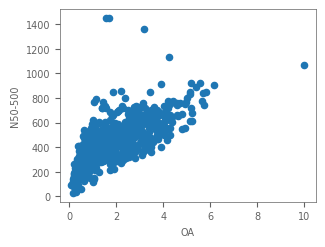

NorESM
120


<AxesSubplot:xlabel='time'>

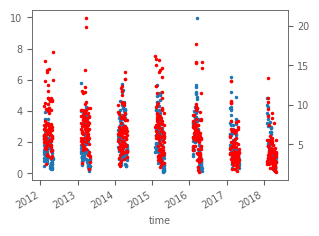

In [55]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['OA'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['OA'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

ECHAM-SALSA
120


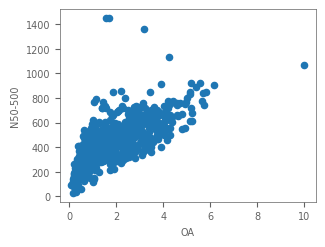

NorESM
120


<AxesSubplot:xlabel='time'>

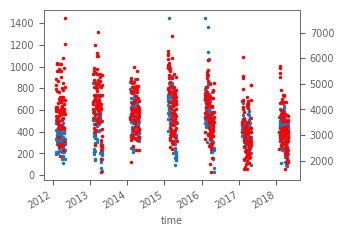

In [56]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['N50-500'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['N50-500'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

In [57]:
models

['ECHAM-SALSA', 'NorESM', 'EC-Earth', 'UKESM']

In [58]:
models_and_obs =  models + ['Observations'] 

## T to OA

In [59]:
label_dic =dict(
    T_C=r'T  [$^\circ$C]',
    OA =r'OA [$\mu g m^{-3}$]',
)

## Define grid

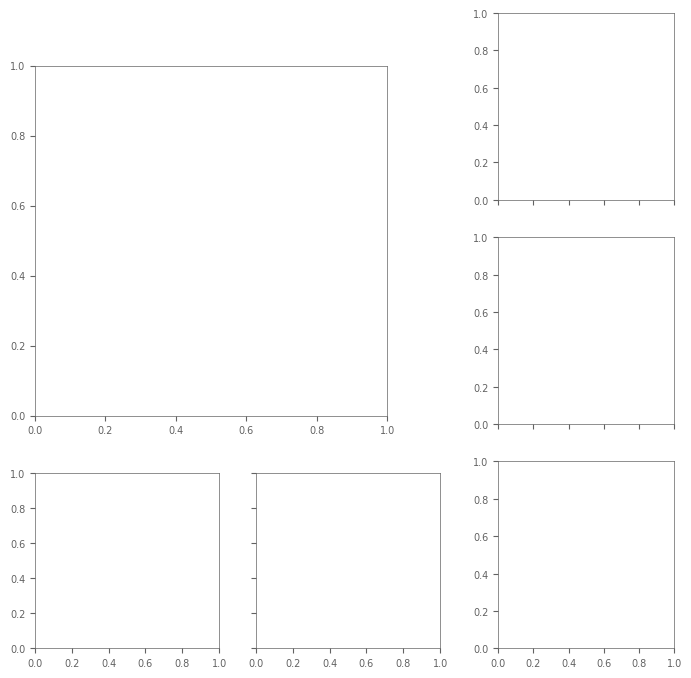

In [60]:

def make_cool_grid5(figsize=None,
                    width_ratios=None,
                    ncols=1,
                    nrows=1,
                    num_subplots_per_big_plot=2,
                    size_big_plot=5,
                    add_gs_kw=None,
                    sharex='col',
                    sharey='row',
                    
                    w_plot = 5.,
                    w_cbar = 1,
                    w_ratio_sideplot = 0.6,
                    frac_dist_axis_from_big = .15
                    ):
    width_small_plot = size_big_plot/num_subplots_per_big_plot
    width_dist_ax = size_big_plot*frac_dist_axis_from_big
    
    if figsize is None:
        
        figsize = [size_big_plot + width_small_plot+ width_dist_ax,
                   size_big_plot + width_small_plot+ width_dist_ax,
                  ]
    #figsize=[10,10]
    width_ratios = None
    add_gs_kw = None

    if width_ratios is None:
        width_ratios = [1] * ncols + [w_cbar / w_plot] #+ [1]* ncols_extra
    if add_gs_kw is None:
        add_gs_kw = dict()


    if 'hspace' not in add_gs_kw.keys():
        add_gs_kw['hspace'] = 0
    if 'wspace' not in add_gs_kw.keys():
        add_gs_kw['wspace'] = 0


    # add_gs_kw['width_ratios'] = width_ratios
    fig = plt.figure(figsize=figsize,
                     dpi=100)

    #gs = fig.add_gridspec(nrows, ncols, **add_gs_kw)

    
    w_r1 = [size_big_plot,size_big_plot*frac_dist_axis_from_big]
    h_r1 = [frac_dist_axis_from_big,1, ]
    
    gs0 = gridspec.GridSpec(2, 2, figure=fig, height_ratios= [size_big_plot+width_dist_ax,width_small_plot],
                            width_ratios = [size_big_plot+width_dist_ax,width_small_plot])
    #fig.show()
    
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows+1, ncols+1, width_ratios=w_r1, height_ratios=h_r1, subplot_spec=gs0[0,0], **add_gs_kw)
    # for the small plots:
    gs01 = gridspec.GridSpecFromSubplotSpec(num_subplots_per_big_plot+1,1, subplot_spec=gs0[:,1])#, **add_gs_kw)
    gs03 = gridspec.GridSpecFromSubplotSpec(1,num_subplots_per_big_plot, subplot_spec=gs0[1,:1])#, **add_gs_kw)

    # gs_s = gs[:,:(ncols+1)].subgridspec(nrows=nrows, ncols=ncols, wspace=add_gs_kw['wspace'], hspace=add_gs_kw['hspace'])
    axs = gs00.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = gs01.subplots(sharex=sharex, sharey=sharey, )
    axs_extra2 = gs03.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = np.concatenate((axs_extra2, axs_extra[::-1],))
    #for i, ax  in enumerate(axs_extra):
    #    ax.text(1,1,f'{i}')
    axs[0,1].clear()
    axs[0,1].axis("off")
    daxs = dict(x=axs[0,0],y=axs[1,1])
    # distribution axis
    for a in daxs:
        _ax = daxs[a]
        sns.despine(bottom=False, left=False, ax=_ax)
        _ax.axis("off")
    #daxs = [dax1,dax2]
    #axs = np.array(axs)

    ax = axs[1,0]


    return fig, ax, daxs, axs_extra


fig, ax, daxs, axs_extra = make_cool_grid5(#ncols_extra=1, nrows_extra=1
                                           )# w_ratio_sideplot=.5)
#for ax_e in axs_extra:
#    ax_e.set_xlabel('')
#    ax_e.set_ylabel('')
#    ax_e.set_ylim(ax.get_ylim())
#    ax_e.set_xlim(ax.get_xlim())
#    ax_e.axes.xaxis.set_ticklabels([])
#    ax_e.axes.yaxis.set_ticklabels([])

#    sns.despine(ax = ax_e)



In [61]:
#parameters, cov= curve_fit(f, x, y)

#model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
#data = scipy.odr.odrpack.Data(x,y)
#myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
#myodr.set_job(fit_type=2)
def compute_p_value(df_s, out, popt):
    parameters = popt
    parameterStatistics = out#myodr.run()    
    x = df_s.dropna()
    df_e = len(x) - len(popt) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.975, df_e)
    ci = []
    for i in range(len(parameters)):
        ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for i in range(len(parameters)):
        print('parameter:', parameters[i])
        print('   conf interval:', ci[i][0], ci[i][1])
        print('   tstat:', tstat_beta[i])
        print('   pstat:', pstat_beta[i])
        print()

## Make plot

In [62]:
def make_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.2,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
             ):
    if fig is None: 
        fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)

    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax_ex in zip(source_list, axs_extra[:]):
        print(mo)
        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()


        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt*.7, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                   )
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        ax_ex.set_title(mo, y=.95)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'{select_station}, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo in source_list:
        print(mo)

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        sns.histplot(#x=v_x,
                    x= df_s[v_x], 
            edgecolor=cdic_model[mo],
            #log_scale=(xscale=='log'),
            color=cdic_model[mo], 
            element="step",
            label=mo,
            linewidth=1,
            #log_scale=(xscale=='log',False,),

            alpha=.1,
            bins=xbins,
            ax = daxs['x'],
                    
                   )
        print(daxs['x'].get_ylim())
        _fi, ax_test = plt.subplots();
        ax_test = sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = ax_test,
            #ax = daxs['y'],
            linewidth=2,
            
            #edgecolor=None,
            #log_scale=(False,yscale=='log'),
            alpha=.1,
            bins=ybins,
        );
        
        sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = daxs['y'],
            linewidth=1,
            
            #edgecolor=None,
            #log_scale=(xscale=='log',yscale=='log'),
            #log_scale=(False,yscale=='log'),
            
            alpha=.1,
            bins=ybins,
            )
        xlim_dist_n = list(ax_test.get_xlim())
        _fi.clf()
        #if xlim_dist_n[1]>xlim_dist_n[1]:
        xlim_dist[1] = max(xlim_dist_n[1],xlim_dist[1])
        #daxs['y'].set_xlim([0,xlim_dist[1]])
        
        #plt.show()

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)


    for ax_e in axs_extra:
        ax_e.set_xlabel('')
        ax_e.set_ylabel('')
        ax_e.set_ylim(ax.get_ylim())
        ax_e.set_xlim(ax.get_xlim())
        ax_e.axes.xaxis.set_ticklabels([])
        ax_e.axes.yaxis.set_ticklabels([])

        sns.despine(ax = ax_e)

    return

#### WET_mid

## T to OA, exp

def get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12]):
    v_log_y = f'ln({v_y})'
    df_s[v_log_y] = np.log(df_s[v_y])
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'linear', return_func=True, beta0=beta0)
    print('****ignore****')
    _, _, _, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'exp', return_func=True, beta0=beta0, pprint=False)
    print('****stop ignore****')
    
    a = np.exp(popt[-1])
    b = popt[0]
    if np.abs(a)< 0.009:
        #a_lab = ((str("%.2e" % a)).replace("e", ' \\cdot 10^{ ')).replace("+0", ") + ' } ')
        label = '($%.1E) \cdot e^{%5.2fx}$' %(a,b,)
    else:
        label = '$%5.2f e^{%5.2fx}$' %(a,b,)
    popt = [a,b]

    return popt, pov, label, func

In [63]:
def get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12]):
    v_log_y = f'ln({v_y})'
    df_s[v_log_y] = np.log(df_s[v_y])
    popt, pov, label, func_lin = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'linear', return_func=True, beta0=beta0)
    print('****ignore****')
    _, _, _, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'exp', return_func=True, beta0=beta0, pprint=False)
    print('****stop ignore****')
    popt_lin = popt
    a = np.exp(popt[-1])
    b = popt[0]
    
    if np.abs(a)< 0.009:
        #a_lab = ((str("%.2e" % a)).replace("e", ' \\cdot 10^{ ')).replace("+0", ") + ' } ')
        label = '($%.1E) \cdot e^{%5.2fx}$' %(a,b,)
    else:
        label = '$%5.2f e^{%5.2fx}$' %(a,b,)
    popt = [a,b]

    return popt, pov, label, func, func_lin, popt_lin

# Emissions

In [64]:
dict_emissions= {
    'emiisop':'emiisop',
    'emiterp':'emiterp',
    'SFisoprene':'emiisop',
    'SFmonoterp':'emiterp',
    'emi_isop_bio':'emiisop',
    'emi_monot_bio':'emiterp',
    'SFisoprene':'emiisop',
    'SFterpene':'emiterp',
}

### UKESM has units: kgC m-2 s-1

for isoprene that should be a correction of M_isop = 68.11702 versus M_isop_c_only = 60.05

In [65]:
M_isop = 68.11702
M_isop_c_only = 12.01*5
ukesm_isop_unit_correction = M_isop/M_isop_c_only
print('correction isop',ukesm_isop_unit_correction)

M_terp = 136.24
M_terp_c_only = 12.01*10
ukesm_terp_unit_correction = M_terp/M_terp_c_only
print('correction terp',ukesm_terp_unit_correction)

correction isop 1.1343383846794337
correction terp 1.1343880099916737


In [66]:
for m in models:
    print(m)
    _df = dic_df_med[m]
    if m=='UKESM':
        if 'SFisoprene' in _df.columns:
            _df['SFisoprene'] = _df['SFisoprene']*ukesm_isop_unit_correction
            print('corrected UKESM isop emi by factor',ukesm_isop_unit_correction)
        if 'SFterpene' in _df.columns:
            _df['SFterpene'] = _df['SFterpene']*ukesm_terp_unit_correction
            print('corrected UKESM terp emi by factor',ukesm_terp_unit_correction)
        
    _df = _df.rename(dict_emissions, axis=1)
    
    dic_df_med[m] = _df


ECHAM-SALSA
NorESM
EC-Earth
UKESM
corrected UKESM isop emi by factor 1.1343383846794337
corrected UKESM terp emi by factor 1.1343880099916737


### NorESM has units: kg m-2 s-1

### EC-Earth has units kg m-2 s-1

### ECHAM-SALSA has units kg m-2 s-1

### Change units to $\mu g$

In [67]:
vars_emi = ['emiisop','emiterp']


In [68]:
for m in models:
    _df = dic_df_med[m]
    for v in vars_emi:
        print(_df[v].mean())
        if _df[v].mean()<1e-9:
            _df[v] = _df[v]*1e9
            print('changes units for {v} from kg/m2/s to ug/m2/s')
    

2.3729776815140202e-11
changes units for {v} from kg/m2/s to ug/m2/s
1.3034315768766134e-10
changes units for {v} from kg/m2/s to ug/m2/s
7.832346055828247e-11
changes units for {v} from kg/m2/s to ug/m2/s
1.485630108945618e-10
changes units for {v} from kg/m2/s to ug/m2/s
1.1015566495595698e-10
changes units for {v} from kg/m2/s to ug/m2/s
1.842399067199129e-11
changes units for {v} from kg/m2/s to ug/m2/s
9.882077552574644e-11
changes units for {v} from kg/m2/s to ug/m2/s
1.0375367548151836e-10
changes units for {v} from kg/m2/s to ug/m2/s


### FMA

In [69]:
models = ['ECHAM-SALSA', 'NorESM', 'EC-Earth', 'UKESM']

### UPS MASK THE INCOMING 

ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
(0.0, 119.7)
NorESM
(0.0, 150.15)
EC-Earth
(0.0, 150.15)
UKESM
(0.0, 150.15)
ECHAM-SALSA
ECHAM-SALSA
[0.01, 0.12]
Beta: [  0.50670559 -12.78041415]
Beta Std Error: [0.02405842 0.62519559]
Beta Covariance: [[ 0.00143945 -0.03736256]
 [-0.03736256  0.97206496]]
Residual Variance: 0.4021022692934069
Inverse Condition #: 0.015534428054173053
Reason(s) for Halting:
  Sum of squares convergence
[  0.50670559 -12.78041415]
reason for halting
****ignore****
[0.01, 0.12]
[1.68894348e-14 1.15917643e+00]
reason for halting
****stop ignore****
NorESM
NorESM
[0.01, 0.12]
Beta: [ 0.37166906 -7.51421643]
Beta Std Error: [0.02437521 0.60372925]
Beta Covariance: [[ 0.0009152  -0.0226463 ]
 [-0.0226463   0.56143777]]
Residual Variance: 0.6492064276190341
Inverse Condition #: 0.014386391799248664
Reason(s) for Halting:
  Sum of squares convergence
[ 0.37166906 -7.51421643]
reason for halting
****ignore****
[0.01, 0.12]
[0.01166377 0.20004194]
reason for halti

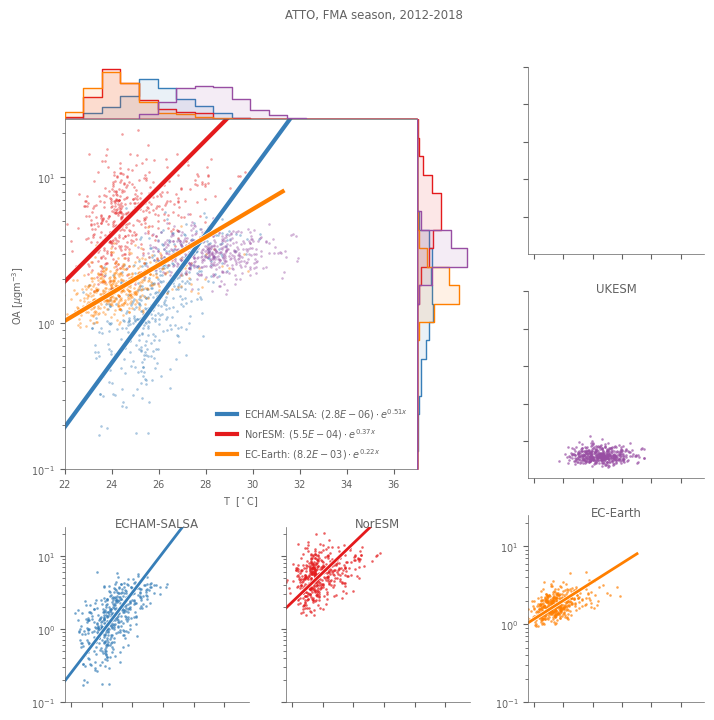

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [70]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu$gm$^{-3}$]'#[$\mu g m^{-3}$]'


linewidth=2
xlims =[5,30]
ylims = [.1,25]
xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'OA'

dic_df_med_adj = dict()

for k in dic_df_med.keys():
    _df  = dic_df_med[k].copy()
    _df = _df[~_df.index.year.isin([2015,2016])]
    
    dic_df_med_adj[k] = _df

make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med_adj,
          #source_list = models
         
         )


for mo, ax_ex in zip(models[:-1], axs_extra[:]):
    if mo is None:
        continue
    print(mo)
    df_s =  dic_df_med_adj[mo]
    
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    df_s = df_s[df_s[[v_x,v_y]].notna().all(axis=1)]
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func,func_lin, popt_lin = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_no2015-2016_{season}', v_x, v_y)
ax.legend(frameon=False)
print(fn)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
(0.0, 138.6)
NorESM
(0.0, 193.2)
EC-Earth
(0.0, 193.2)
UKESM
(0.0, 193.2)
ECHAM-SALSA
ECHAM-SALSA
[0.01, 0.12]
Beta: [-0.2441937   2.49296328]
Beta Std Error: [0.01635946 0.44971272]
Beta Covariance: [[ 0.00032421 -0.00887287]
 [-0.00887287  0.24499273]]
Residual Variance: 0.8255001455170945
Inverse Condition #: 0.029363611043992006
Reason(s) for Halting:
  Sum of squares convergence
[-0.2441937   2.49296328]
reason for halting
****ignore****
[0.01, 0.12]
[-0.95289297  0.05372439]
reason for halting
****stop ignore****
NorESM
NorESM
[0.01, 0.12]
Beta: [  0.43524172 -13.71882186]
Beta Std Error: [0.02112491 0.52579491]
Beta Covariance: [[ 0.00082861 -0.02059983]
 [-0.02059983  0.51332585]]
Residual Variance: 0.5385668469620022
Inverse Condition #: 0.015975653228472633
Reason(s) for Halting:
  Sum of squares convergence
[  0.43524172 -13.71882186]
reason for halting
****ignore****
[0.01, 0.12]
[-1.79178177e+02 -1.66743355e-01]
reason for halt

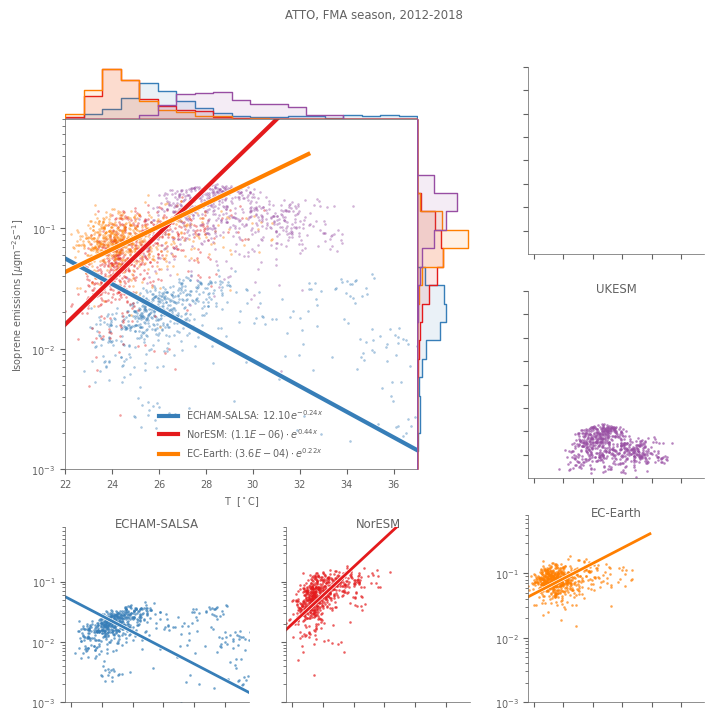

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [71]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'Isoprene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'


linewidth=2
xlims =[5,30]
ylims = [1e-3,8e-1]
xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiisop'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med,
          #source_list = models
         
         )


for mo, ax_ex in zip(models[:-1], axs_extra[:]):
    if mo is None:
        continue
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if 'emi' in v_y:
        df_s = df_s[df_s[v_y]>0]
    df_s = df_s[df_s[[v_x,v_y]].notna().all(axis=1)]
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func,func_lin, popt_lin = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
print(fn)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
(0.0, 138.6)
NorESM
(0.0, 193.2)
EC-Earth
(0.0, 193.2)
UKESM
(0.0, 193.2)
ECHAM-SALSA
ECHAM-SALSA
[0.01, 0.12]
Beta: [-0.20921675  3.27553126]
Beta Std Error: [0.0115921  0.31886989]
Beta Covariance: [[ 0.00020704 -0.00566634]
 [-0.00566634  0.15666167]]
Residual Variance: 0.6490292520227943
Inverse Condition #: 0.03150651696204267
Reason(s) for Halting:
  Sum of squares convergence
[-0.20921675  3.27553126]
reason for halting
****ignore****
[0.01, 0.12]
[-0.29468747  0.07640773]
reason for halting
****stop ignore****
NorESM
NorESM
[0.01, 0.12]
Beta: [ 0.133785   -5.39996592]
Beta Std Error: [0.00616324 0.15340673]
Beta Covariance: [[ 7.62069631e-05 -1.89455844e-03]
 [-1.89455844e-03  4.72134006e-02]]
Residual Variance: 0.49845221237683746
Inverse Condition #: 0.01619483595056393
Reason(s) for Halting:
  Sum of squares convergence
[ 0.133785   -5.39996592]
reason for halting
****ignore****
[0.01, 0.12]
[-1.18621631e-11  1.04113722e+00]
reas

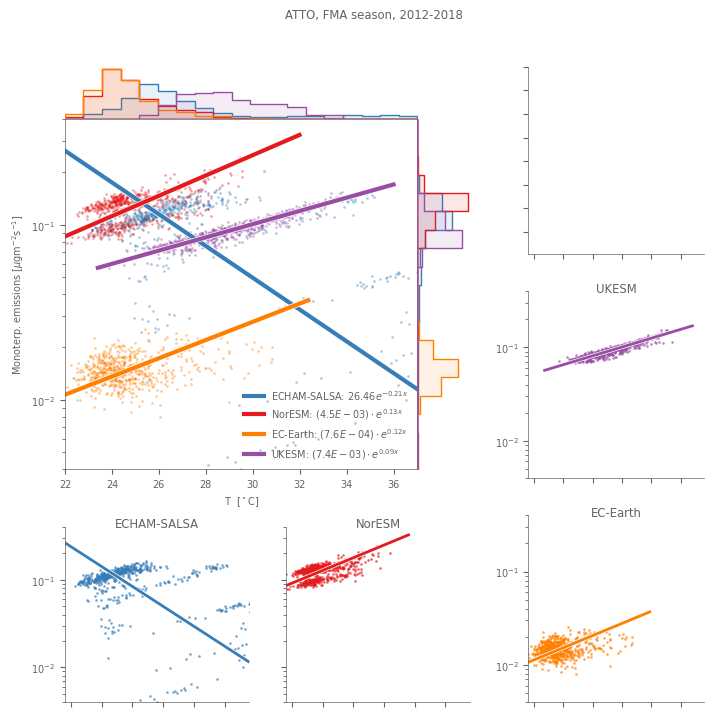

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [72]:

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'Monoterp. emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'


linewidth=2
xlims =[5,30]
ylims = [4e-3,4e-1]
xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiterp'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med,
          #source_list = models
         
         )


for mo, ax_ex in zip(models, axs_extra[:]):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if 'emi' in v_y:
        df_s = df_s[df_s[v_y]>0]
    df_s = df_s[df_s[[v_x,v_y]].notna().all(axis=1)]
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func,func_lin, popt_lin = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
(0.0, 139.65)
NorESM
(0.0, 151.2)
EC-Earth
(0.0, 364.35)
UKESM
(0.0, 364.35)
ECHAM-SALSA
ECHAM-SALSA
NorESM
NorESM
EC-Earth
EC-Earth
UKESM
UKESM


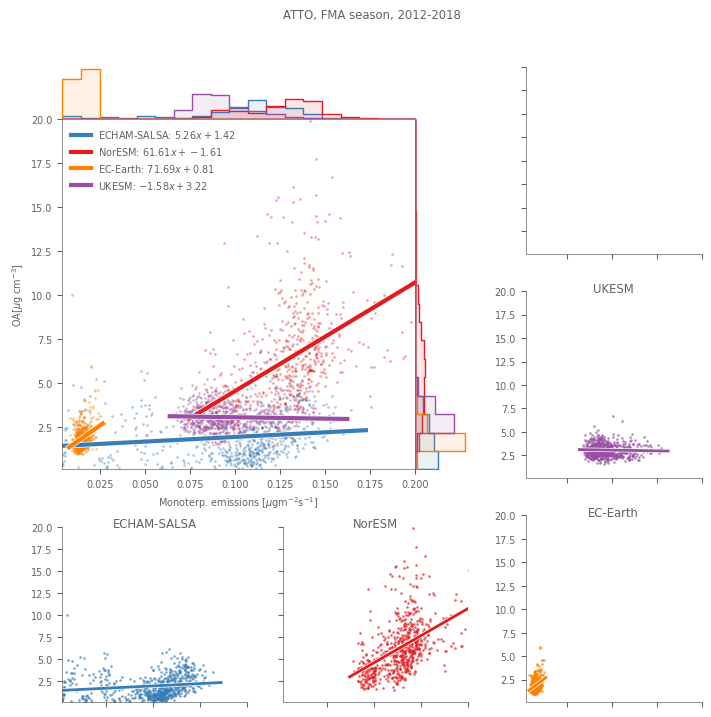

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [73]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'Monoterp. emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'

ylab = r'OA[$\mu$g cm$^{-3}$]'#[$\mu g m^{-3}$]'


linewidth=2
lims =[5,30]
xlims = [4e-3,2e-1]
ylims = [1e-1,20]


season='FMA'
v_x = 'emiterp'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models, fig, ax, daxs, axs_extra,
          yscale='linear',
          dic_df_med = dic_df_med,
          #source_list = models
         
         )


for mo, ax_ex in zip(models, axs_extra[:]):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if 'emi' in v_y:
        df_s = df_s[df_s[v_y]>0]
    df_s = df_s[df_s[[v_x,v_y]].notna().all(axis=1)]
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func,func_lin, popt_lin = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func= get_linear_fit(df_s, v_x, v_y,  return_func=True,)# beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('linear')
ax.set_yscale('linear')
ax.set_xscale('linear')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
(0.0, 329.7)
NorESM
(0.0, 329.7)
EC-Earth
(0.0, 329.7)
UKESM
(0.0, 329.7)
ECHAM-SALSA
ECHAM-SALSA
NorESM
NorESM
EC-Earth
EC-Earth
UKESM
UKESM
Plots/ATTO/scat_all_years_echam_noresm_exp1_FMA_emiisop_OA-ATTO_ukesm_lev-2.png


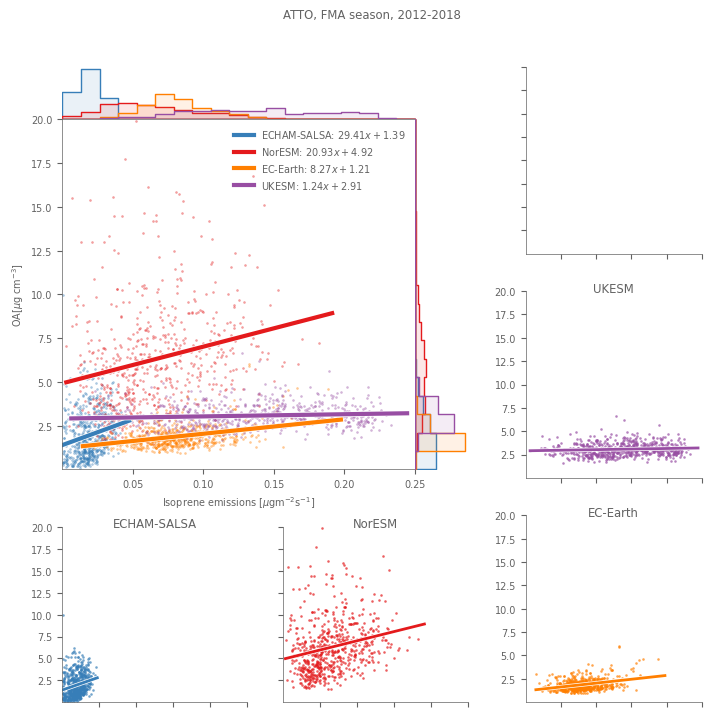

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [74]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'Isoprene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'

ylab = r'OA[$\mu$g cm$^{-3}$]'#[$\mu g m^{-3}$]'


linewidth=2
lims =[5,30]
xlims = [1e-9,2.5e-1]
ylims = [1e-8,20]


season='FMA'
v_x = 'emiisop'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models, fig, ax, daxs, axs_extra,
          yscale='linear',
          dic_df_med = dic_df_med,
          #source_list = models
         
         )


for mo, ax_ex in zip(models, axs_extra[:]):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if 'emi' in v_y:
        df_s = df_s[df_s[v_y]>0]
    df_s = df_s[df_s[[v_x,v_y]].notna().all(axis=1)]
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func= get_linear_fit(df_s, v_x, v_y,  return_func=True,)# beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('linear')
ax.set_yscale('linear')
ax.set_xscale('linear')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

print(fn)

plt.show()

In [75]:
axs_extra

array([<AxesSubplot:title={'center':'ECHAM-SALSA'}>,
       <AxesSubplot:title={'center':'NorESM'}>,
       <AxesSubplot:title={'center':'EC-Earth'}>,
       <AxesSubplot:title={'center':'UKESM'}>, <AxesSubplot:>],
      dtype=object)

In [76]:
from matplotlib import colors

ECHAM-SALSA
ECHAM-SALSA
0.21172240518566865
NorESM
NorESM
0.23066753551186717
EC-Earth
EC-Earth
0.3423791342685813
UKESM
UKESM
0.09115397640266866
ECHAM-SALSA
ECHAM-SALSA
0.14639553879442035
NorESM
NorESM
0.47706319392439406
EC-Earth
EC-Earth
0.3232658551065782
UKESM
UKESM
-0.03867612713262132


/tmp/ipykernel_192884/645663845.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
No handles with labels found to put in legend.


Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiisop_emiterp_zyear_emiisop_OA-ATTO_ukesm_lev-2.png


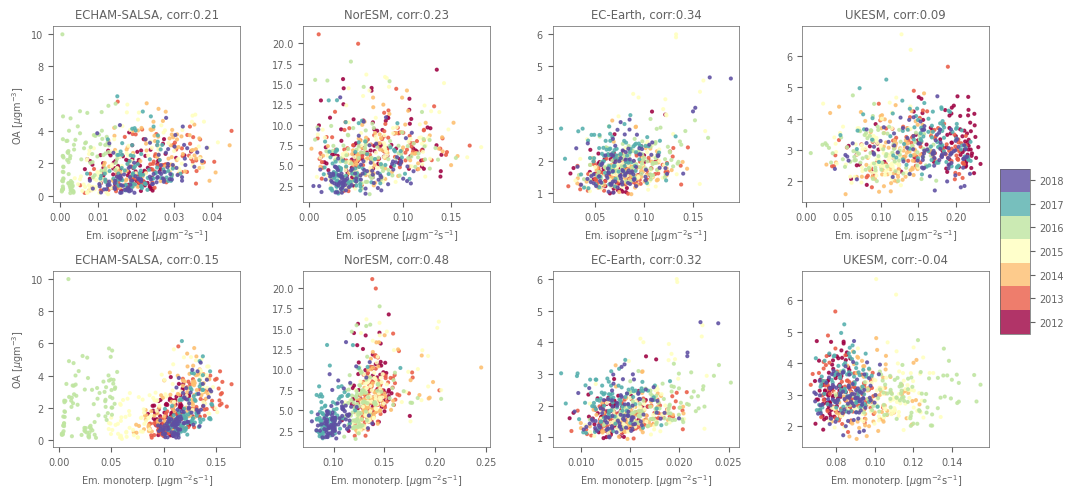

In [77]:
y_lab = 'OA [$\mu$gm$^{-3}$]'
v_x1 = 'emiisop'
v_x2 = 'emiterp'

x_lab1 = 'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
x_lab2 = 'Em. monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'

v_y = 'OA'
v_z = 'year'
season = 'FMA'
f, axs_extra = plt.subplots(2,4, figsize=[10,5])

def do_it(v_x,v_y, v_z, axs, xlab, ylab):

    for mo, ax in zip(models, axs):
        print(mo)
        df_mo =  dic_df_med[mo]
        print(mo)
        mask_months = select_months(df_mo, season=season)
        df_mo = df_mo[mask_months].copy()

        s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
                   s=4,
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )
              )
        _co = df_mo[v_x].corr( df_mo[v_y])
        print(_co)
        #ax.text(0.1,8, f'corr:{_co:.2f}')
        #ax.set_title(mo)
        ax.set_title(f'{mo}, corr:{_co:.2f}')
    
        ax.set_ylabel(v_y)
        if xlab is None:
            ax.set_xlabel(v_x)
        else:
            ax.set_xlabel(xlab)
        if ylab is None:
            ax.set_ylabel(v_y)
        else:
            ax.set_ylabel(ylab)
            
            
    return s 

################################
axs = axs_extra[0,:]
v_x = v_x1
x_lab = x_lab1
s = do_it(v_x,v_y, v_z, axs, x_lab, ylab)
    
################################
    
################################

axs = axs_extra[1,:]
v_x = v_x2
x_lab = x_lab2
#s = do_it(v_x2,v_y, v_z, axs)
s = do_it(v_x,v_y, v_z, axs, x_lab, ylab)
################################

cbar_ax = f.add_axes([1, 0.33, 0.03, 0.33])
f.colorbar(s, cax=cbar_ax)
f.tight_layout()
for ax in axs_extra.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
for ax in axs_extra[0,:]:
    ax.set_xlabel(x_lab1)

for ax in axs_extra[1,:]:
    ax.set_xlabel(x_lab2)

axs_extra[0,0].set_ylabel(y_lab)
axs_extra[1,0].set_ylabel(y_lab)


ax.legend(frameon=False)
fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

f.savefig(fn, dpi=150, bbox_inches="tight")
f.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

print(fn) 

plt.show()

In [78]:
_df = dic_df_med['Observations']
index_observed_values_exist = _df[~_df[['OA','T_C']].isna().any(axis=1)].index
index_observed_values_exist

DatetimeIndex(['2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13',
               '2014-03-14', '2014-03-15', '2014-03-16', '2014-03-17',
               '2014-03-18', '2014-03-19',
               ...
               '2017-12-10', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15', '2017-12-16', '2017-12-17',
               '2017-12-18', '2017-12-19'],
              dtype='datetime64[ns]', name='time', length=630, freq=None)

/tmp/ipykernel_192884/2324115235.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
No handles with labels found to put in legend.


ECHAM-SALSA
ECHAM-SALSA
0.5407019225166418
NorESM
NorESM
0.38895587952103855
EC-Earth
EC-Earth
0.4343463802859569
UKESM
UKESM
-0.018744994065870078
Observations
Observations
0.5447699709014449
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_zyear_T_C_OA-ATTO_ukesm_lev-2.png


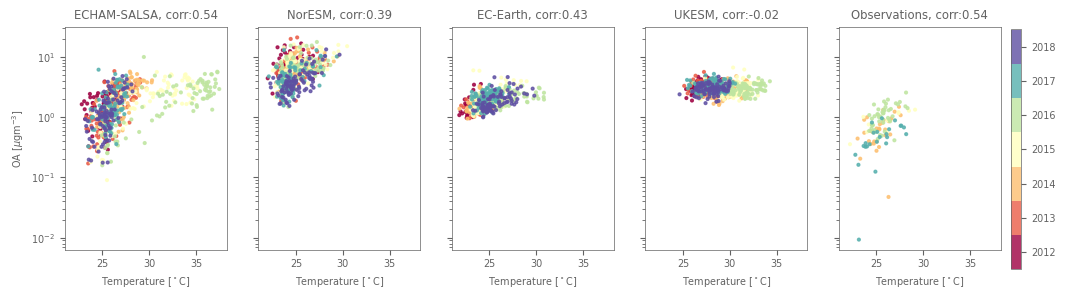

In [79]:
y_lab = 'OA [$\mu$gm$^{-3}$]'
v_x = 'T_C'

x_lab = 'Temperature [$^\circ$C]'
v_y = 'OA'
v_z = 'year'
season = 'FMA'
f, axs_extra = plt.subplots(1,5, figsize=[10,3], sharey=True, sharex=True)

def do_it(v_x,v_y, v_z, axs, xlab, ylab):

    for mo, ax in zip(models_and_obs, axs):
        print(mo)
        df_mo =  dic_df_med[mo]
        print(mo)
        mask_months = select_months(df_mo, season=season)
        df_mo = df_mo[mask_months].copy()
        df_mo['year'] = df_mo.index.year
        #df_mo = df_mo.loc[index_observed_values_exist[index_observed_values_exist.isin(df_mo.index)]]
        s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
                   s=4,
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )
              )
        _co = df_mo[v_x].corr( df_mo[v_y])
        print(_co)
        #ax.text(0.1,8, f'corr:{_co:.2f}')
        #ax.set_title(mo)
        ax.set_title(f'{mo}, corr:{_co:.2f}')
    
        ax.set_ylabel(v_y)
        if xlab is None:
            ax.set_xlabel(v_x)
        else:
            ax.set_xlabel(xlab)
        if ylab is None:
            ax.set_ylabel(v_y)
        else:
            ax.set_ylabel(ylab)
            
            
    return s 

################################
axs = axs_extra#[0,:]
s = do_it(v_x,v_y, v_z, axs, x_lab, ylab)
    
################################
    
################################
################################

cbar_ax = f.add_axes([1, 0.1, 0.01, 0.8])
f.colorbar(s, cax=cbar_ax)
f.tight_layout()
for ax in axs_extra.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
for ax in axs_extra:
    ax.set_xlabel(x_lab)
    ax.set_yscale('log')

axs_extra[0].set_ylabel(y_lab)



ax.legend(frameon=False)
fn = make_fn_scat(f'scatter_{season}_z{v_z}', v_x, v_y)



f.savefig(fn, dpi=150, bbox_inches="tight")
f.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

print(fn) 

plt.show()

/tmp/ipykernel_192884/1507419991.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
No handles with labels found to put in legend.


ECHAM-SALSA
ECHAM-SALSA
0.6124192136701488
NorESM
NorESM
0.3312491544211134
EC-Earth
EC-Earth
0.4506920187988741
UKESM
UKESM
0.008468753953154003
Plots/ATTO/scat_all_years_echam_noresm_scatter_no2015_2016_FMA_zyear_T_C_OA-ATTO_ukesm_lev-2.png


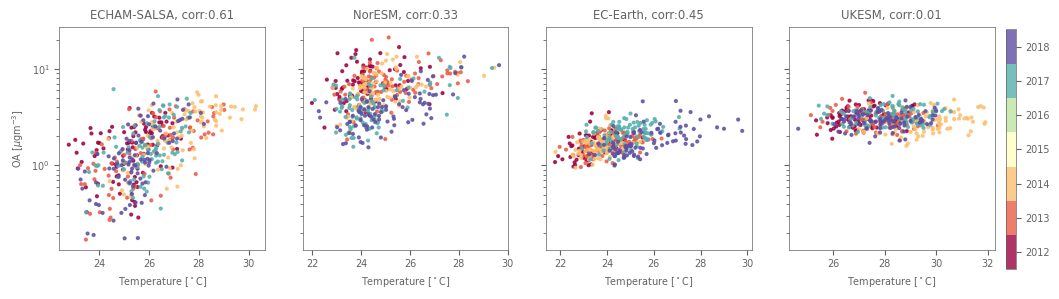

In [80]:
y_lab = 'OA [$\mu$gm$^{-3}$]'
v_x = 'T_C'

x_lab = 'Temperature [$^\circ$C]'
v_y = 'OA'
v_z = 'year'
season = 'FMA'
f, axs_extra = plt.subplots(1,4, figsize=[10,3], sharey=True)

def do_it(v_x,v_y, v_z, axs, xlab, ylab):

    for mo, ax in zip(models, axs):
        print(mo)
        df_mo =  dic_df_med[mo].copy()
        print(mo)
        df_mo = df_mo[~df_mo.index.year.isin([2015,2016])]
        mask_months = select_months(df_mo, season=season)
        df_mo = df_mo[mask_months].copy()

        s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
                   s=4,
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )
              )
        _co = df_mo[v_x].corr( df_mo[v_y])
        print(_co)
        #ax.text(0.1,8, f'corr:{_co:.2f}')
        #ax.set_title(mo)
        ax.set_title(f'{mo}, corr:{_co:.2f}')
    
        ax.set_ylabel(v_y)
        if xlab is None:
            ax.set_xlabel(v_x)
        else:
            ax.set_xlabel(xlab)
        if ylab is None:
            ax.set_ylabel(v_y)
        else:
            ax.set_ylabel(ylab)
            
            
    return s 

################################
axs = axs_extra#[0,:]
s = do_it(v_x,v_y, v_z, axs, x_lab, ylab)
    
################################
    
################################
################################

cbar_ax = f.add_axes([1, 0.1, 0.01, 0.8])
f.colorbar(s, cax=cbar_ax)
f.tight_layout()
for ax in axs_extra.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
for ax in axs_extra:
    ax.set_xlabel(x_lab)
    ax.set_yscale('log')

axs_extra[0].set_ylabel(y_lab)



ax.legend(frameon=False)
fn = make_fn_scat(f'scatter_no2015_2016_{season}_z{v_z}', v_x, v_y)



f.savefig(fn, dpi=150, bbox_inches="tight")
f.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

print(fn) 

plt.show()

ECHAM-SALSA
ECHAM-SALSA
-0.04898902161988781
NorESM
NorESM
0.5243275872012061
EC-Earth
EC-Earth
0.18987132712365756
UKESM
UKESM
-0.19907536817625623
ECHAM-SALSA
ECHAM-SALSA
-0.30218556588894974
NorESM
NorESM
0.5403685852077263
EC-Earth
EC-Earth
0.2895460854598027
UKESM
UKESM
0.9253359963359539


/tmp/ipykernel_192884/567226404.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
No handles with labels found to put in legend.


Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_T_C_zyear_emiisop_emiterp-ATTO_ukesm_lev-2.png


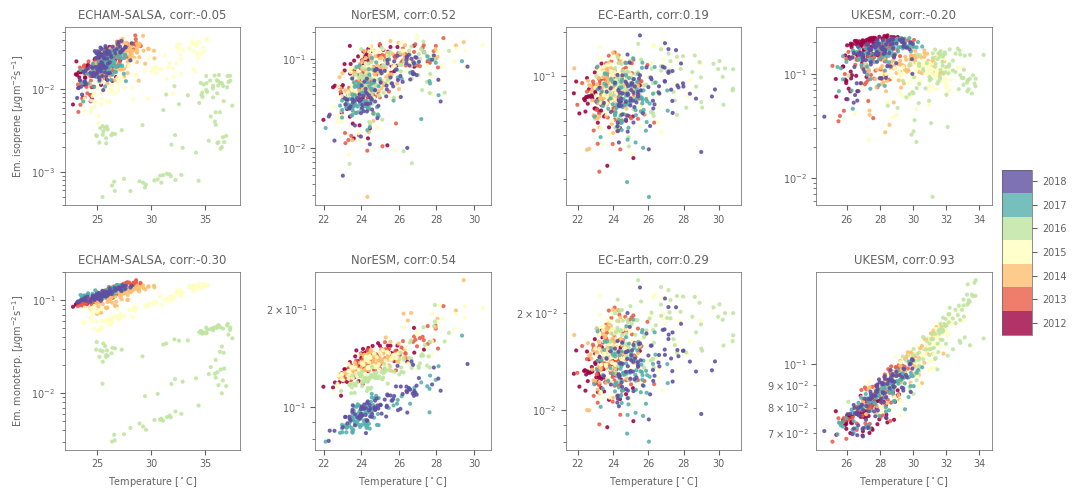

In [81]:
v_x = 'T_C'
v_y1 = 'emiisop'
v_y2 = 'emiterp'
y_lab1 = 'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
y_lab2 = 'Em. monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
x_lab = 'Temperature [$^\circ$C]'
v_z = 'year'

season = 'FMA'
f, axs_extra = plt.subplots(2,4, figsize=[10,5])

def do_it(v_x,v_y, v_z, axs, xlab, ylab):

    for mo, ax in zip(models, axs):
        print(mo)
        df_mo =  dic_df_med[mo]
        print(mo)
        mask_months = select_months(df_mo, season=season)
        df_mo = df_mo[mask_months].copy()

        s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
                   s=4,
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )
              )
        _co = df_mo[v_x].corr( df_mo[v_y])
        print(_co)
        #ax.text(0.1,8, f'corr:{_co:.2f}')
        #ax.set_title(mo)
        ax.set_title(f'{mo}, corr:{_co:.2f}')
    
        ax.set_ylabel(v_y)
        if xlab is None:
            ax.set_xlabel(v_x)
        else:
            ax.set_xlabel(xlab)
        if ylab is None:
            ax.set_ylabel(v_y)
        else:
            ax.set_ylabel(ylab)
            
            
    return s 

####################################
axs = axs_extra[0,:]
v_y = v_y1
y_lab = y_lab1
s = do_it(v_x,v_y, v_z, axs, x_lab, y_lab)
    
####################################
v_y = v_y2
y_lab = y_lab2
axs = axs_extra[1,:]
#s = do_it(v_x2,v_y, v_z, axs)
s = do_it(v_x,v_y, v_z, axs, x_lab, y_lab)
####################################
cbar_ax = f.add_axes([1, 0.33, 0.03, 0.33])
f.colorbar(s, cax=cbar_ax)
f.tight_layout()


ax.legend(frameon=False)
fn = make_fn_scat(f'scatter_{season}_{v_x}_z{v_z}', v_y1, v_y2)
for ax in axs_extra.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yscale('log')
for ax in axs_extra[1,:]:
    ax.set_xlabel(x_lab)

axs_extra[0,0].set_ylabel(y_lab1)
axs_extra[1,0].set_ylabel(y_lab2)



f.savefig(fn, dpi=150, bbox_inches="tight")
f.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

print(fn) 

plt.show()

In [82]:
from bs_fdbck_clean.util.plot.plot_settings import insert_abc_axs

T_C emiisop
FSDS_DRF emiisop
T_C emiterp
FSDS_DRF emiterp
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_T_C_FSDS_DRF_zyear_T_C_emiterp-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/2323779514.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


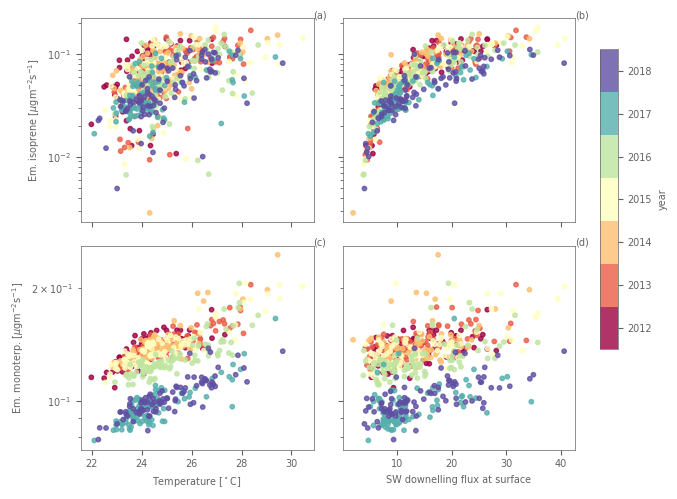

In [83]:
model_name = 'NorESM'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'T_C'    
v_x2 = 'FSDS_DRF'
v_y1 = 'emiisop'    
v_y2 = 'emiterp'

xlab1 = 'Temperature [$^\circ$C]'
xlab2 = 'SW downelling flux at surface'
ylab1 = 'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = 'Em. monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('log')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('log')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

fig.savefig(fn, dpi=150, bbox_inches="tight")
fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


ISOP_gas oh_con
APIN_gas oh_con
ISOP_gas VBS1_gas_conc
APIN_gas VBS1_gas_conc
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_ISOP_gas_APIN_gas_zyear_ISOP_gas_VBS1_gas_conc-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/2524763051.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


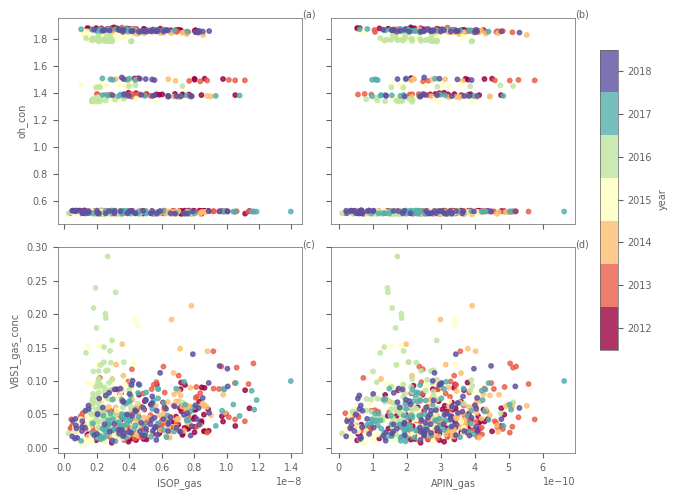

In [84]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'ISOP_gas'    

v_x2 = 'APIN_gas'
v_y1 = 'oh_con'    
v_y2 = 'VBS1_gas_conc'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiisop ISOP_gas
emiterp ISOP_gas
emiisop APIN_gas
emiterp APIN_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiisop_emiterp_zyear_emiisop_APIN_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/302668928.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


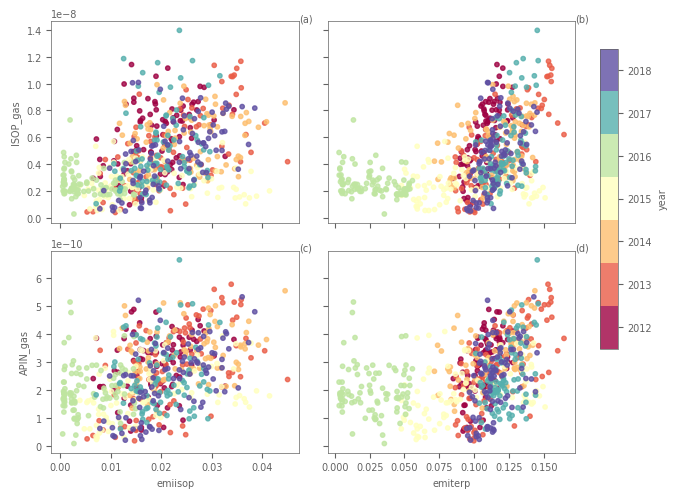

In [85]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiisop'    
v_x2 = 'emiterp'
v_y1 = 'ISOP_gas'    
v_y2 = 'APIN_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


ISOP_gas VBS0_gas
APIN_gas VBS0_gas
ISOP_gas VBS1_gas
APIN_gas VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_ISOP_gas_APIN_gas_zyear_ISOP_gas_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/2548247240.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


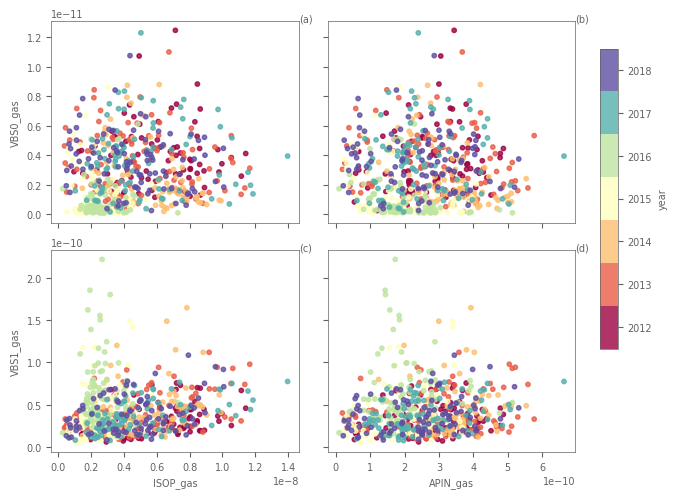

In [86]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'ISOP_gas'    
v_x2 = 'APIN_gas'
v_y1 = 'VBS0_gas'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


ISOP_gas VBS1_gas
APIN_gas VBS1_gas
ISOP_gas VBS10_gas
APIN_gas VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_ISOP_gas_APIN_gas_zyear_ISOP_gas_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/897924136.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


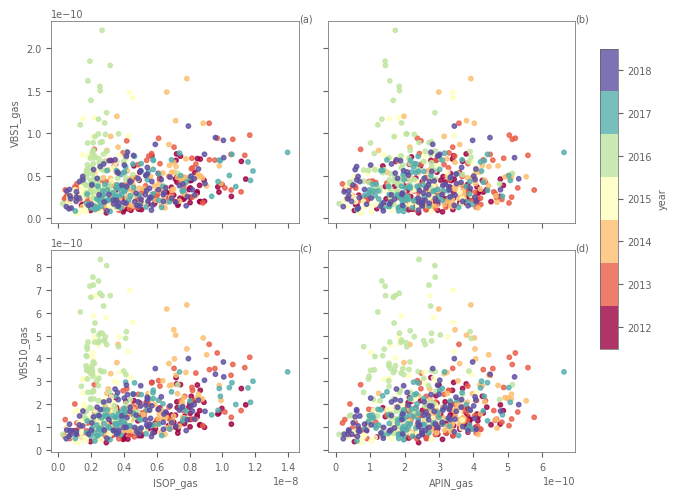

In [87]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'ISOP_gas'    
v_x2 = 'APIN_gas'
v_y1 = 'VBS1_gas'    
v_y2 = 'VBS10_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


T_C VBS1_gas
APIN_gas VBS1_gas
T_C VBS10_gas
APIN_gas VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_T_C_APIN_gas_zyear_T_C_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/1964165970.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


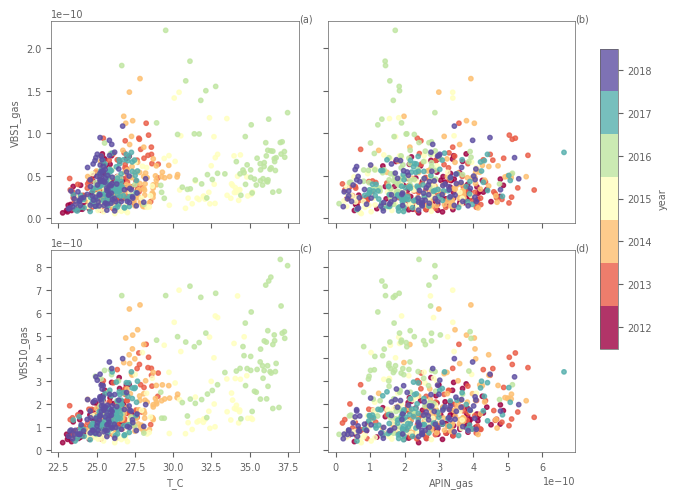

In [88]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'T_C'    
v_x2 = 'APIN_gas'
v_y1 = 'VBS1_gas'    
v_y2 = 'VBS10_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


T_C VBS0_gas
APIN_gas VBS0_gas
T_C VBS1_gas
APIN_gas VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_T_C_APIN_gas_zyear_T_C_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/638088377.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


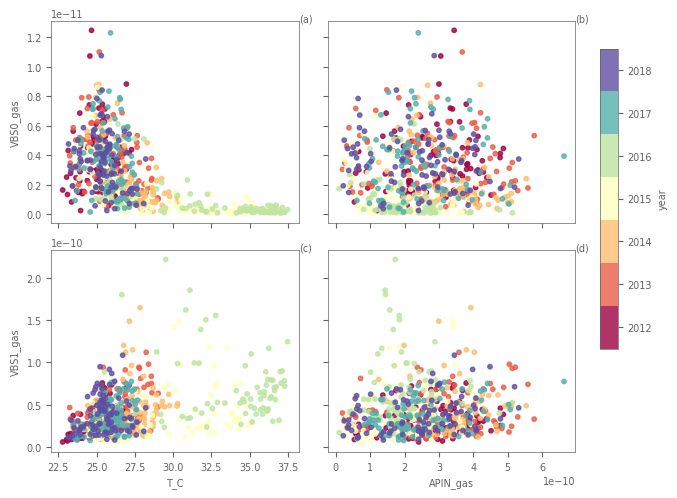

In [89]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'T_C'    
v_x2 = 'APIN_gas'
v_y1 = 'VBS0_gas'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
VBS0_gas OA
emiterp VBS1_gas
VBS0_gas VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_VBS0_gas_zT_C_emiterp_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/1010156768.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


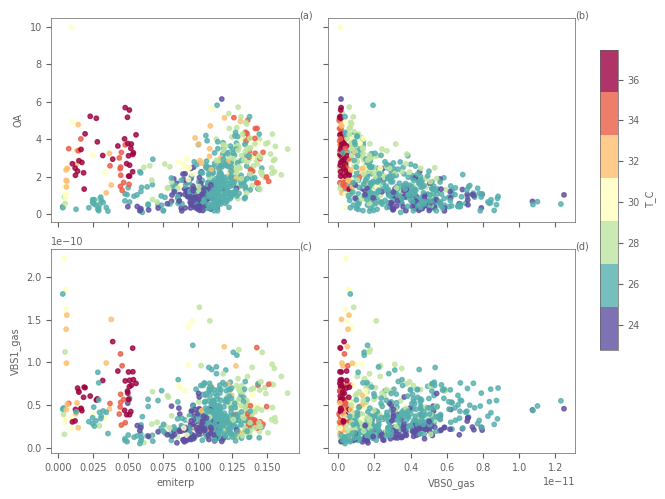

In [90]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'VBS0_gas'
v_y1 = 'OA'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
VBS1_gas OA
emiterp VBS1_gas
VBS1_gas VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_VBS1_gas_zT_C_emiterp_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/3377005123.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


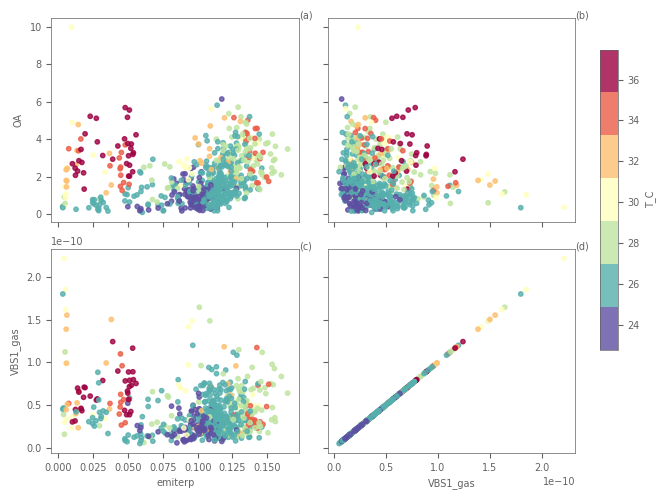

In [91]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'VBS1_gas'
v_y1 = 'OA'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp VBS0_gas
year year
emiisop VBS0_gas
emiterp VBS1_gas
emiisop VBS1_gas
emiterp VBS10_gas
emiisop VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_emiisop_zyear_emiterp_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/1572368014.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


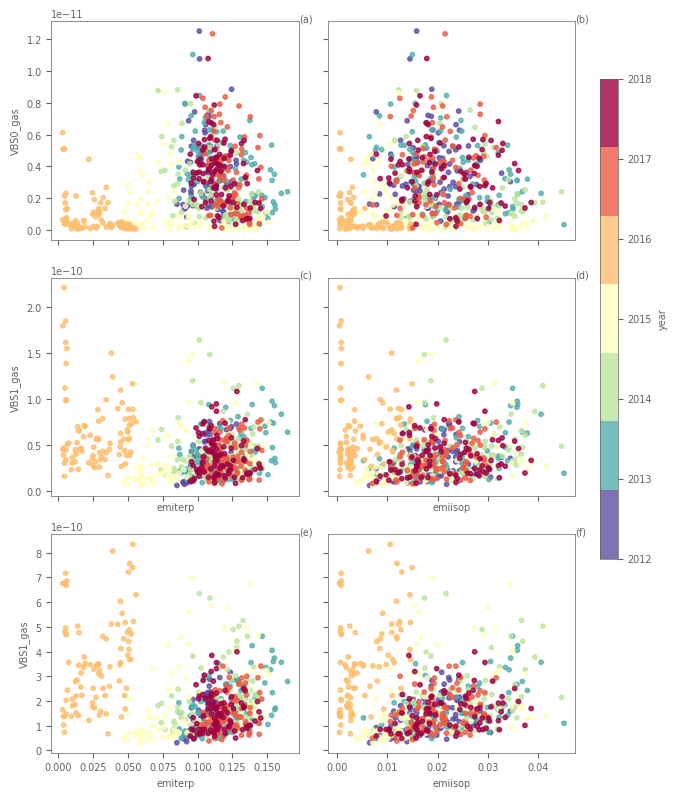

In [92]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(3,2, figsize = [6,8], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'emiisop'
v_y1 = 'VBS0_gas'
v_y2 = 'VBS1_gas'    
v_y3 = 'VBS10_gas'    

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################

########################
v_x = v_x1
v_y = v_y3
lab_x = xlab1
lab_y = ylab2
ax = axs[2,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y3
lab_x = xlab2
lab_y = ylab2
ax = axs[2,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp VBS0_gas
T_C T_C
emiisop VBS0_gas
emiterp VBS1_gas
emiisop VBS1_gas
emiterp VBS10_gas
emiisop VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_emiisop_zT_C_emiterp_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/3630478102.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


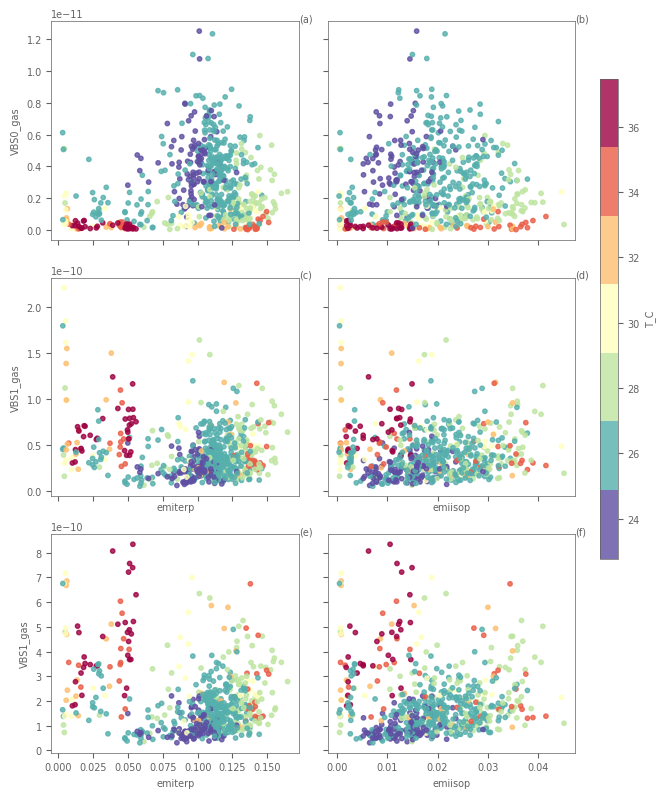

In [93]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(3,2, figsize = [6,8], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'emiisop'
v_y1 = 'VBS0_gas'
v_y2 = 'VBS1_gas'    
v_y3 = 'VBS10_gas'    

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################

########################
v_x = v_x1
v_y = v_y3
lab_x = xlab1
lab_y = ylab2
ax = axs[2,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y3
lab_x = xlab2
lab_y = ylab2
ax = axs[2,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
emiisop OA
emiterp VBS0_gas
emiisop VBS0_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_emiisop_zT_C_emiterp_VBS0_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/3077160900.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


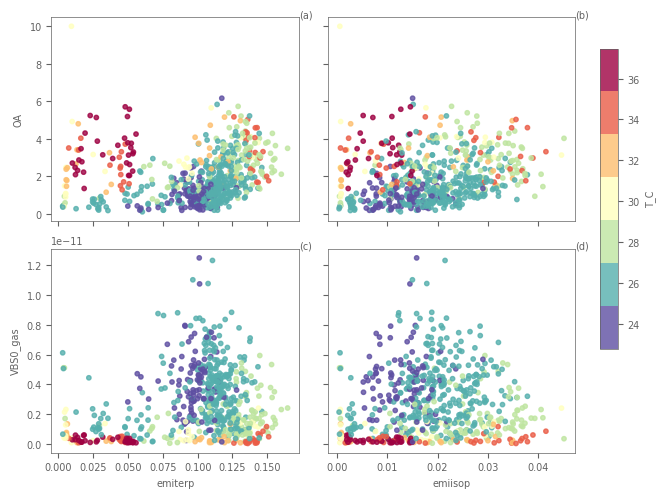

In [94]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'emiisop'
v_y1 = 'OA'    
v_y2 = 'VBS0_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
emiisop OA
emiterp VBS10_gas
emiisop VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_emiisop_zT_C_emiterp_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/2917695714.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


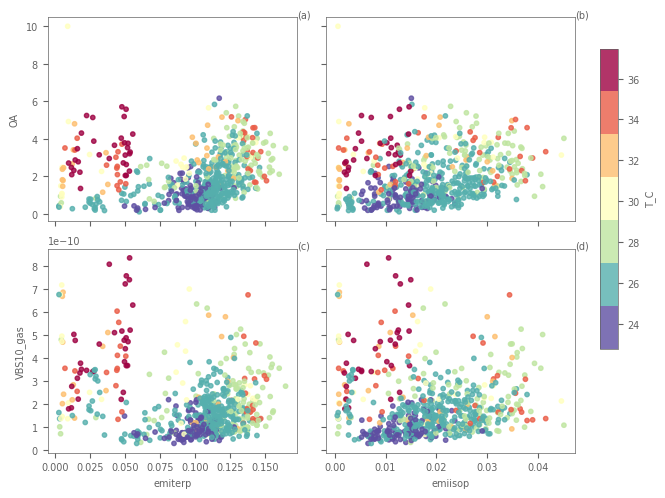

In [95]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'emiisop'
v_y1 = 'OA'    
v_y2 = 'VBS10_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

fig.savefig(fn, dpi=150, bbox_inches="tight")
fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


T_C OA
emiterp emiterp
emiisop OA
T_C VBS10_gas
emiisop VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_T_C_emiisop_zemiterp_T_C_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/2677122282.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


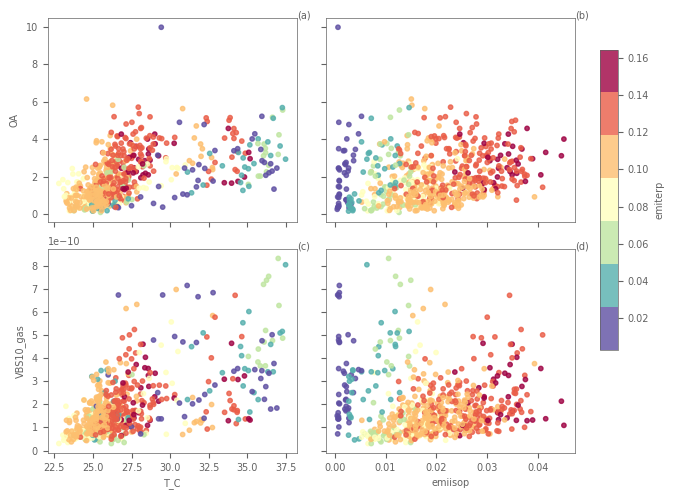

In [96]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'T_C'    
v_x2 = 'emiisop'
v_y1 = 'OA'    
v_y2 = 'VBS10_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'emiterp'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

fig.savefig(fn, dpi=150, bbox_inches="tight")
fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
APIN_gas OA
emiterp VBS1_gas
APIN_gas VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_APIN_gas_zT_C_emiterp_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/4263416516.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


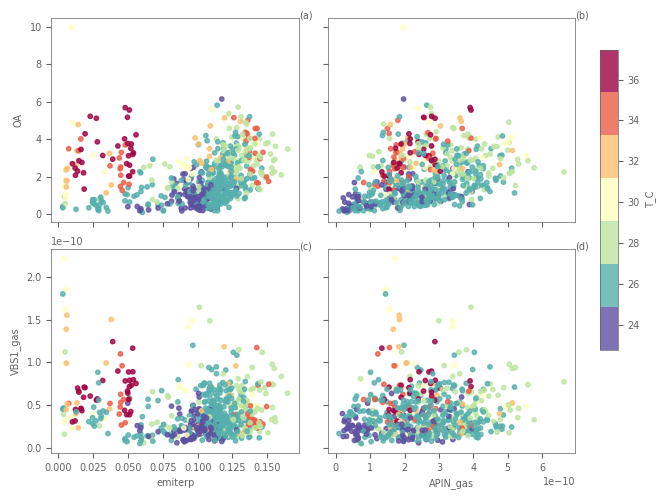

In [97]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'APIN_gas'
v_y1 = 'OA'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
oh_con OA
emiterp VBS1_gas
oh_con VBS1_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_oh_con_zT_C_emiterp_VBS1_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/3910179345.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


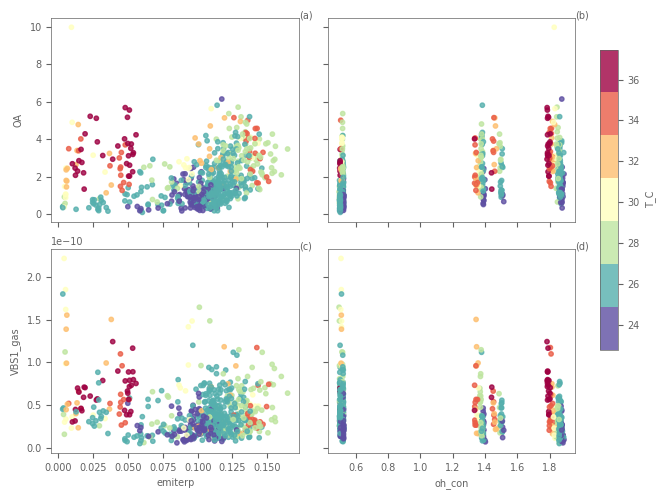

In [98]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'oh_con'
v_y1 = 'OA'    
v_y2 = 'VBS1_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiterp OA
T_C T_C
APIN_gas OA
emiterp VBS10_gas
APIN_gas VBS10_gas
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiterp_APIN_gas_zT_C_emiterp_VBS10_gas-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/389436582.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


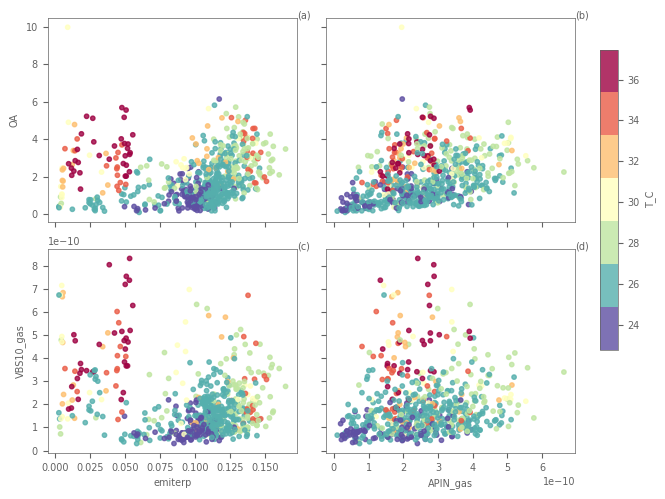

In [99]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral_r', lut=7),
               #norm = colors.Normalize(
               #    vmin=2011.5,
               #    vmax=2018.5,
               #    )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiterp'    
v_x2 = 'APIN_gas'
v_y1 = 'OA'    
v_y2 = 'VBS10_gas'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'T_C'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
print(v_z, lab_z)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
s = do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


emiisop SO2_gas
emiterp SO2_gas
emiisop VBS10_gas_conc
emiterp VBS10_gas_conc
Plots/ATTO/scat_all_years_echam_noresm_scatter_FMA_emiisop_emiterp_zyear_emiisop_VBS10_gas_conc-ATTO_ukesm_lev-2.png


/tmp/ipykernel_192884/3442360935.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


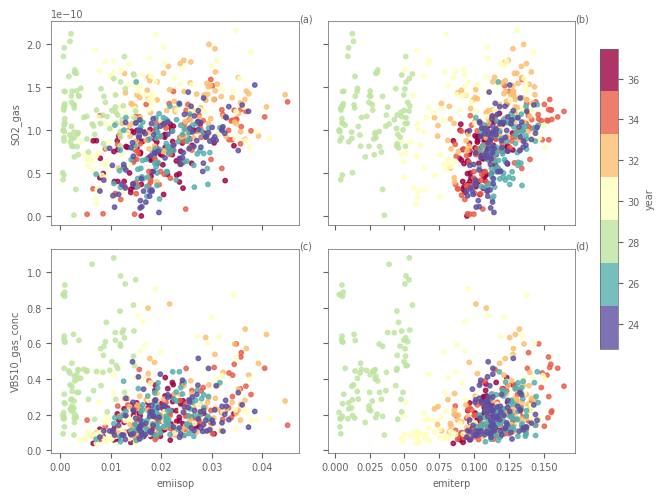

In [100]:
model_name = 'ECHAM-SALSA'
fig, axs = plt.subplots(2,2, figsize = [6,5], sharey='row', sharex='col')
axs = axs

## Settings
alpha_scatt = 0.6
linewidth=2
season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()

def do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax):
    s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               s=10,
               
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )

    return s





#df_mo = df_mo.loc['2015':None,:]
v_x1 = 'emiisop'    
v_x2 = 'emiterp'
v_y1 = 'SO2_gas'    
v_y2 = 'VBS10_gas_conc'

xlab1 = v_x1#'Temperature [$^\circ$C]'
xlab2 = v_x2#'SW downelling flux at surface'
ylab1 = v_y1#'Em. isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
ylab2 = v_y2#'Em. terpene [$\mu$gm$^{-2}$s$^{-1}$]'
v_z = 'year'

lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


########################
v_x = v_x1
v_y = v_y1
lab_x = xlab1
lab_y = ylab1
ax = axs[0,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
#ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y1
lab_x = xlab2
lab_y = ylab1
ax = axs[0,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
#ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')
########################

########################
v_x = v_x1
v_y = v_y2
lab_x = xlab1
lab_y = ylab2
ax = axs[1,0]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)
ax.set_yscale('linear')
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

########################
########################
v_x = v_x2
v_y = v_y2
lab_x = xlab2
lab_y = ylab2
ax = axs[1,1]
print(v_x,v_y)
do_it(v_x, v_y, v_z, lab_x, lab_y,lab_z, ax)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

########################


cbar_ax = fig.add_axes([1, 0.3, 0.03, 0.6])
fig.colorbar(s,label=lab_z, cax=cbar_ax)


fn = make_fn_scat(f'scatter_{season}_{v_x1}_{v_x2}_z{v_z}', v_x1, v_y)

print(fn)
insert_abc_axs(axs,)# scale_1=0, scale_2=.5)
plt.tight_layout()

#fig.savefig(fn, dpi=150, bbox_inches="tight")
#fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

plt.show()


In [101]:
li= list(df_mo.columns)
li.sort()
li

['APIN_gas',
 'BPIN_gas',
 'CARENE3_gas',
 'ISOP_gas',
 'LIMON_gas',
 'MYRC_gas',
 'N100',
 'N100-500',
 'N200',
 'N200-500',
 'N250',
 'N3',
 'N50',
 'N50-500',
 'N500',
 'OA',
 'OAG',
 'ORG_mass',
 'SABIN_gas',
 'SO2_gas',
 'T',
 'TBETAOCI_gas',
 'T_C',
 'VBS0_gas',
 'VBS0_gas_conc',
 'VBS10_gas',
 'VBS10_gas_conc',
 'VBS1_gas',
 'VBS1_gas_conc',
 'airdens',
 'ang550865',
 'aot550nm',
 'aot865nm',
 'apm',
 'ccn02',
 'ccn10',
 'ceff',
 'ceff_ct',
 'ceff_um',
 'cl_time',
 'clfr',
 'cod',
 'cwp',
 'cwp_orig',
 'emiisop',
 'emiterp',
 'geom',
 'lcdnc',
 'lcdnc_cm3',
 'lcdnc_ct',
 'lcdnc_ct_cm3',
 'lev',
 'log10(N100)',
 'log10(N200)',
 'log10(N50)',
 'log10(OA)',
 'lon',
 'mmrtrN100',
 'mmrtrN200',
 'mmrtrN250',
 'mmrtrN3',
 'mmrtrN50',
 'mmrtrN500',
 'month',
 'obs_N100-500',
 'obs_OA',
 'oh_con',
 'up_lw',
 'up_lw_cs',
 'up_lw_cs_noa',
 'up_lw_noa',
 'up_sw',
 'up_sw_cs',
 'up_sw_cs_noa',
 'up_sw_noa',
 'uw',
 'vw',
 'year']

No handles with labels found to put in legend.


ECHAM-SALSA
ECHAM-SALSA
NorESM
NorESM
EC-Earth
EC-Earth
UKESM
UKESM
ECHAM-SALSA
ECHAM-SALSA
NorESM
NorESM
EC-Earth
EC-Earth
UKESM
UKESM
Plots/ATTO/scat_all_years_echam_noresm_correlation_through_year_emiterp_OA_emiisop-ATTO_ukesm_lev-2.png


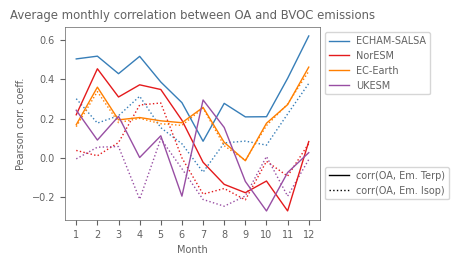

In [102]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()

v_x ='OA'
v_y='emiisop'
v_y2='emiterp'


for mo in models:
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    _df_cov = df_s[v_y].rolling(30).corr(df_s[v_x])#.groupby('m').mean()#.plot()
    _df_cov.groupby(_df_cov.index.month).mean().plot(label='__nolabel__', c= cdic_model[mo], linestyle=':')
plt.legend()

lines = []
for mo in models:
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    _df_cov = df_s[v_y2].rolling(30).corr(df_s[v_x])#.groupby('m').mean()#.plot()
    l = _df_cov.groupby(_df_cov.index.month).mean().plot(label=mo, c= cdic_model[mo])
    lines.append(l)

    
    
leg1 = ax.legend(bbox_to_anchor=(1,1,))
custom_lines = [Line2D([0], [0], color='k',linestyle='solid', lw=1),
                Line2D([0], [0], color='k',linestyle=':', lw=1)]

ax.legend(custom_lines, ['corr(OA, Em. Terp)','corr(OA, Em. Isop)'], bbox_to_anchor=(1,.3,))

ax.add_artist(leg1)
plt.title(f'Average monthly correlation between OA and BVOC emissions')
plt.ylabel('Pearson corr. coeff.')
plt.xlabel('Month')
ax.set_xticks(np.arange(1,13))

fn = make_fn_scat(f'correlation_through_year_{v_y2}', v_x, v_y)
fig.savefig(fn, dpi=150, bbox_inches="tight")
fig.savefig(fn.with_suffix('.pdf'), dpi=150,bbox_inches="tight")

print(fn)

In [103]:
mo

'UKESM'

<AxesSubplot:xlabel='time'>

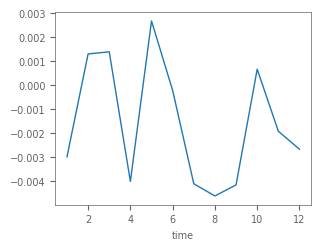

In [104]:
_df_cov = df_s['emiisop'].rolling(30).cov(df_s['OA'])#.groupby('m').mean()#.plot()
_df_cov.groupby(_df_cov.index.month).mean().plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


FSDS_DRF emiisop


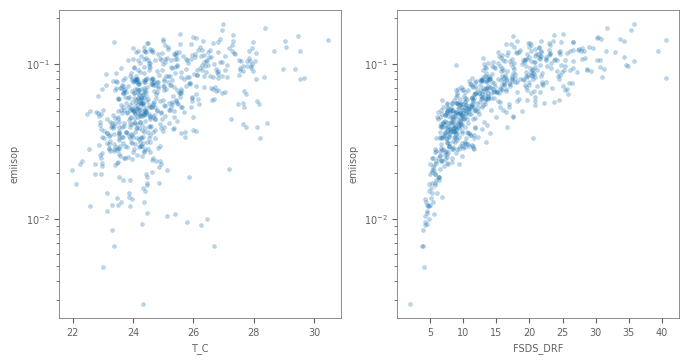

In [105]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [8,4])
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiisop'
    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
sns.scatterplot(v_x,v_y,data = df_mo, ax= ax, edgecolor=None, alpha=.3)

ax.set_yscale('log')



season='FMA'
v_x = 'FSDS_DRF'
v_y = 'emiisop'
    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[1]
print(v_x,v_y)
sns.scatterplot(v_x,v_y,data = df_mo, ax= ax, edgecolor=None, alpha=.3)
ax.set_yscale('log')

plt.show()

In [106]:
from matplotlib.colors import Normalize

In [107]:
import matplotlib.colors as colors

In [108]:
class PiecewiseNorm(colors.Normalize):
    def __init__(self, levels, clip=False):
        # input levels
        self._levels = np.sort(levels)
        # corresponding normalized values between 0 and 1
        self._normed = np.linspace(0, 1, len(levels))
        Normalize.__init__(self, None, None, clip)

    def __call__(self, value, clip=None):
        # linearly interpolate to get the normalized value
        return np.ma.masked_array(np.interp(value, self._levels, self._normed))

    def inverse(self, value):
        return 1.0 - self.__call__(value)

T_C emiterp
FSDS_DRF emiterp


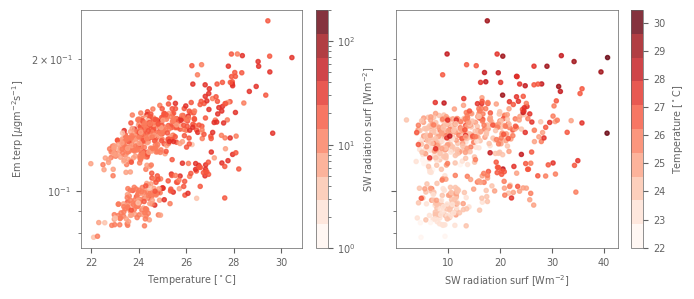

In [109]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
v_x = 'T_C'    
v_y = 'emiterp'
v_z = 'FSDS_DRF'

lab_x = 'Temperature [$^\circ$C]'
lab_y = 'Em terp [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')






v_x = 'FSDS_DRF'
v_z = 'T_C'    

lab_x = 'SW radiation surf [Wm$^{-2}$]'
lab_z = 'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
#ax.set_xscale('log')

plt.tight_layout()
plt.show()


T_C emiisop
FSDS_DRF emiisop


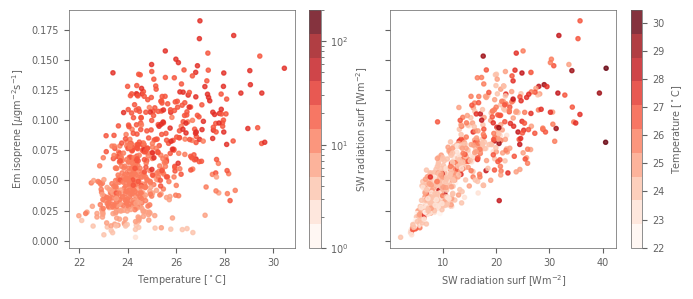

In [110]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiisop'
    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'T_C'    
v_y = 'emiisop'
v_z = 'FSDS_DRF'

lab_x = 'Temperature [$^\circ$C]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('linear')






v_x = 'FSDS_DRF'
v_y = 'emiisop'
v_z = 'T_C'    

lab_x = 'SW radiation surf [Wm$^{-2}$]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
#ax.set_xscale('log')

plt.tight_layout()
plt.show()


T_C T_C
FSDS_DRF T_C


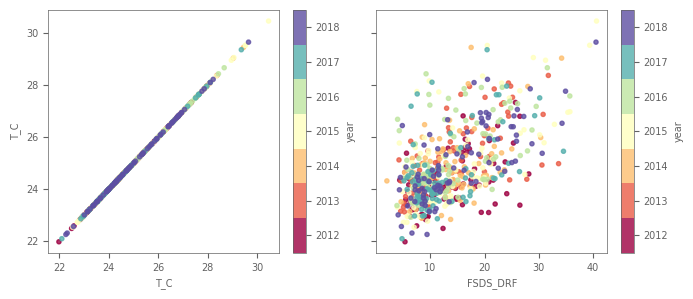

In [111]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
#df_mo = df_mo.loc['2015':None,:]
ax = axs[0]
v_x = 'T_C'    
v_y = 'T_C'
v_z = 'year'

lab_x = v_x#'Temperature [$^\circ$C]'
lab_y = v_y#'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')






v_x = 'FSDS_DRF'
v_y = 'T_C'
v_z = 'year'#'T_C'    

lab_x = v_x#'SW radiation surf [Wm$^{-2}$]'
lab_y = v_y#'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'month'#'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=10),
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')

plt.tight_layout()
plt.show()


T_C OA
FSDS_DRF OA


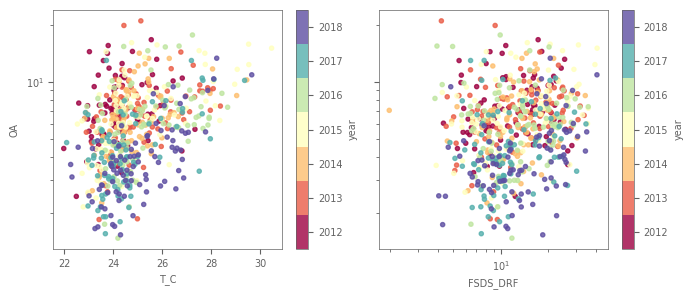

In [112]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
#df_mo = df_mo.loc['2015':None,:]
ax = axs[0]
v_x = 'T_C'    
v_y = 'OA'
v_z = 'year'

lab_x = v_x#'Temperature [$^\circ$C]'
lab_y = v_y#'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
               cmap=plt.cm.get_cmap('Spectral', lut=7),
               norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')






v_x = 'FSDS_DRF'
#v_y = 'emiterp'
v_z = 'year'#'T_C'    

lab_x = v_x#'SW radiation surf [Wm$^{-2}$]'
lab_y = v_y#'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'month'#'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               #cmap=plt.cm.get_cmap('Reds', lut=10),
               cmap=plt.cm.get_cmap('Spectral', lut=7),
                   norm = colors.Normalize(
                   vmin=2011.5,
                   vmax=2018.5,
                   )

              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


T_C emiterp
FSDS_DRF emiterp


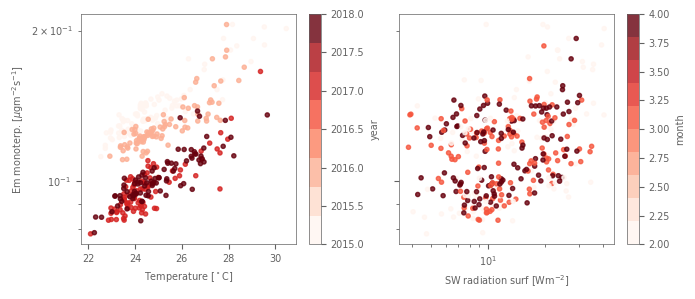

In [113]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Monoterp. emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
df_mo = df_mo.loc['2015':None,:]
ax = axs[0]
v_x = 'T_C'    
v_y = 'emiterp'
v_z = 'year'

lab_x = 'Temperature [$^\circ$C]'
lab_y = 'Em monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')






v_x = 'FSDS_DRF'
v_y = 'emiterp'
v_z = 'month'#'T_C'    

lab_x = 'SW radiation surf [Wm$^{-2}$]'
lab_y = 'Em monoterp. [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'month'#'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


T_C OA
FSDS_DRF OA


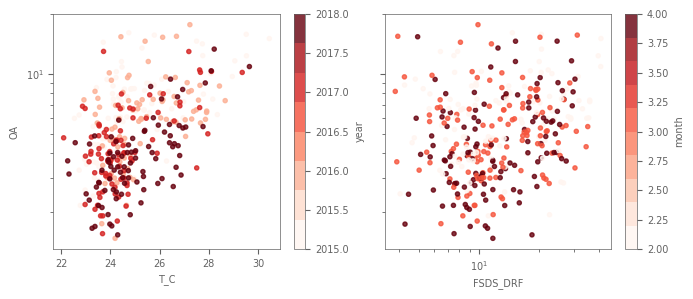

In [114]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
df_mo = df_mo.loc['2015':None,:]
ax = axs[0]
v_x = 'T_C'    
v_y = 'OA'
v_z = 'year'

lab_x = v_x#'Temperature [$^\circ$C]'
lab_y = v_y#'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=8),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')






v_x = 'FSDS_DRF'
v_y = 'OA'
v_z = 'month'#'T_C'    

lab_x = v_x#'SW radiation surf [Wm$^{-2}$]'
lab_y = v_y #'Em terpene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = v_z#'month'#'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


emiterp OA
emiterp OA


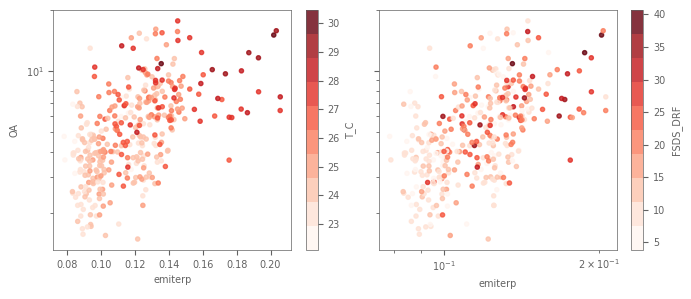

In [115]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
df_mo = df_mo.loc['2015':None,:]
ax = axs[0]
v_x = 'emiterp'    
v_y = 'OA'
v_z = 'T_C'

lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')


v_z = 'FSDS_DRF'
lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


emiterp OA
emiterp OA


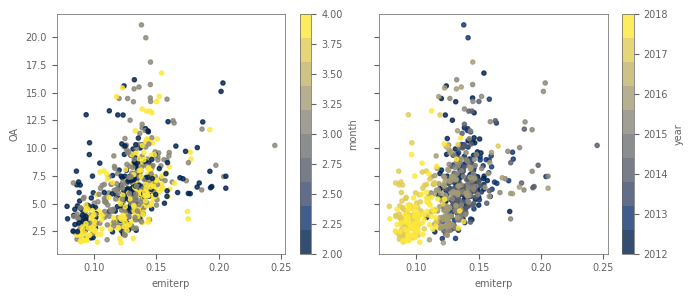

In [116]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'emiterp'    
v_y = 'OA'
v_z = 'month'

lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('cividis', lut=10),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')


v_z = 'year'
lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('cividis', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')

plt.tight_layout()
plt.show()


emiisop OA
emiisop OA


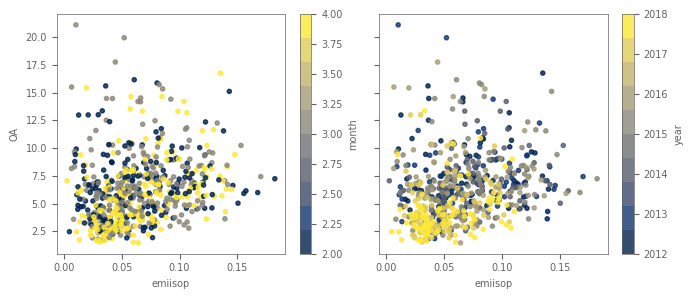

In [117]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'emiisop'    
v_y = 'OA'
v_z = 'month'

lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('cividis', lut=10),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')


v_z = 'year'
lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('cividis', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('linear')
ax.set_xscale('linear')

plt.tight_layout()
plt.show()


emiisop OA
emiisop OA


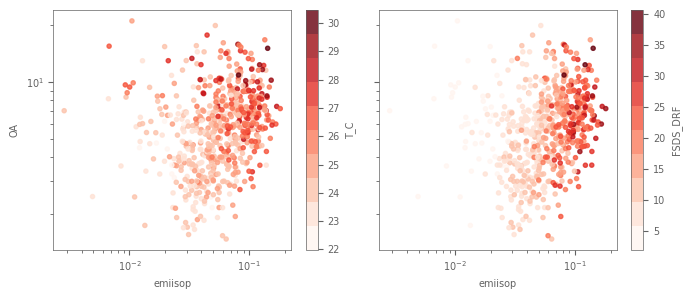

In [118]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'emiisop'    
v_y = 'OA'
v_z = 'T_C'

lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               #norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_yscale('log')
ax.set_xscale('log')

v_z = 'FSDS_DRF'
lab_x = v_x
lab_y = v_y
lab_z = v_z


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


emiisop OA
emiisop OA


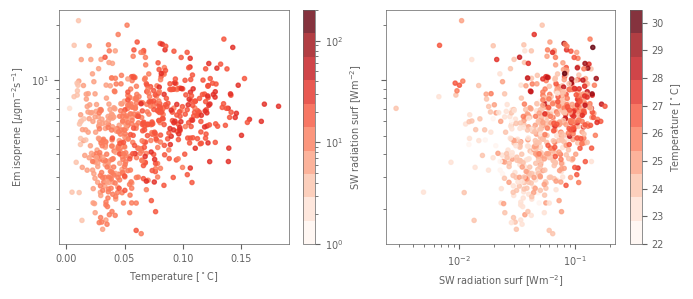

In [119]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,2, figsize = [7,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'

    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'emiisop'    
v_y = 'OA'
v_z = 'FSDS_DRF'

lab_x = 'Temperature [$^\circ$C]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax, )
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')




v_x = 'emiisop'    
v_y = 'OA'
v_z = 'T_C'    

lab_x = 'SW radiation surf [Wm$^{-2}$]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'Temperature [$^\circ$C]'


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tight_layout()
plt.show()


T_C emiisop
T_C emiisop
FSDS_DRF emiterp


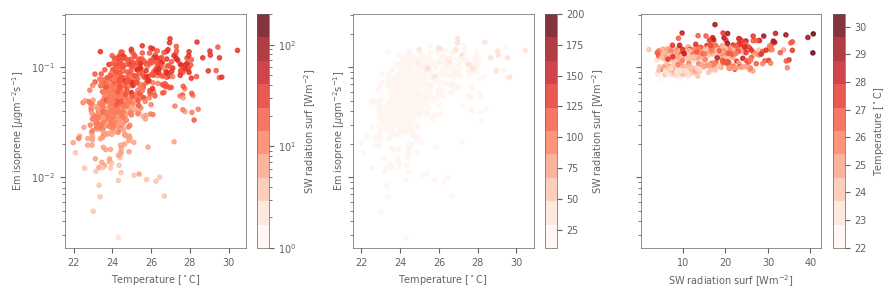

In [120]:
model_name = 'NorESM'
fig, axs = plt.subplots(1,3, figsize = [9,3], sharey=True)
axs = axs.flatten()

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiterp'
    

df_mo = dic_df_med[model_name]
mask_months = select_months(df_mo, season=season)
df_mo = df_mo[mask_months].copy()
ax = axs[0]
v_x = 'T_C'    
v_y = 'emiisop'
v_z = 'FSDS_DRF'

lab_x = 'Temperature [$^\circ$C]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'SW radiation surf [Wm$^{-2}$]'


ax = axs[0]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               norm=colors.LogNorm(1,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax)
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')


ax = axs[1]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], edgecolor=None, alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
               norm=colors.Normalize(10,200, )#,extend='both'
              
              )
plt.colorbar(s, label=lab_z, ax=ax)
ax.set_xlabel(lab_x)
ax.set_ylabel(lab_y)

ax.set_yscale('log')



v_x = 'FSDS_DRF'
v_y = 'emiterp'
v_z = 'T_C'    

lab_x = 'SW radiation surf [Wm$^{-2}$]'
lab_y = 'Em isoprene [$\mu$gm$^{-2}$s$^{-1}$]'
lab_z = 'Temperature [$^\circ$C]'


ax = axs[2]
print(v_x,v_y)
s = ax.scatter(df_mo[v_x],df_mo[v_y], 
               edgecolor=None, 
               alpha=.8, 
               c=df_mo[v_z], 
               cmap=plt.cm.get_cmap('Reds', lut=10),
              )
plt.colorbar(s, label=lab_z, ax=ax)

ax.set_xlabel(lab_x)
#ax.set_ylabel(lab_y)

ax.set_yscale('log')
#ax.set_xscale('log')

plt.tight_layout()
plt.show()


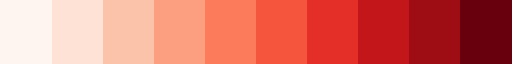

In [121]:
plt.cm.get_cmap('Reds', lut=10)

In [122]:
sns.scatterplot(v_x,v_y,data = df_mo, ax= ax, edgecolor=None, alpha=.3)


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW radiation surf [Wm$^{-2}$]', ylabel='emiterp'>

In [123]:
model_name

'NorESM'

In [124]:
cn = list(dic_df_mod_case[model_name].keys())[0]
df_mo_full = dic_df_mod_case[model_name][cn]

<AxesSubplot:xlabel='time'>

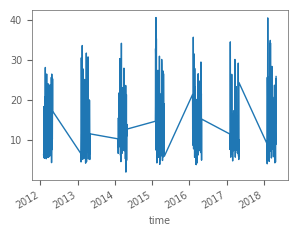

In [125]:
df_mo['FSDS_DRF'].plot()

<AxesSubplot:xlabel='time'>

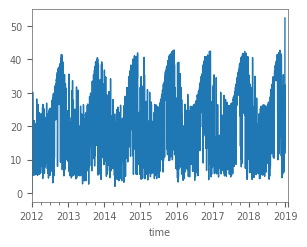

In [126]:
df_mo_full['FSDS_DRF'].resample('D').median().plot()

<AxesSubplot:xlabel='time'>

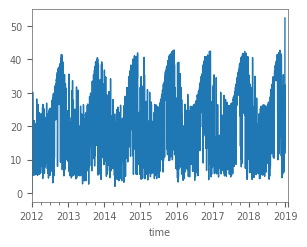

In [127]:
df_mo_full['FSDS_DRF'].resample('d').median().plot()

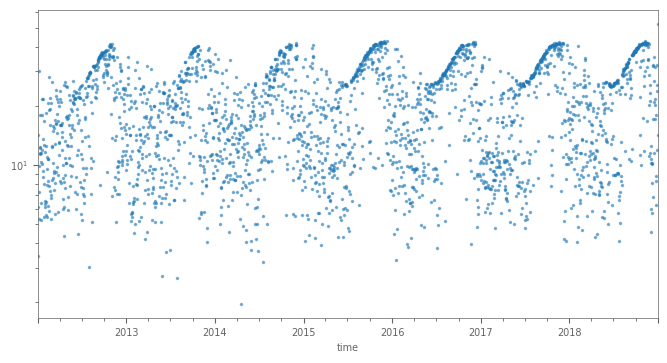

In [128]:
model_name = 'NorESM'
fig, axs = plt.subplots(1, figsize = [8,4])

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiisop'
    

df_mo = dic_df_med[model_name]
#mask_months = select_months(df_mo, season=season)
#df_mo = df_mo[mask_months].copy()


v_y = 'FSDS_DRF'
#v_y = 'emiisop'
    

ax = axs
#sns.lineplot(y=v_y,data = df_mo, ax= ax, alpha=.3, marker='.')
df_mo[v_y].plot(ax=ax, linewidth=0, marker='.', alpha=.5)
ax.set_yscale('log')

plt.show()

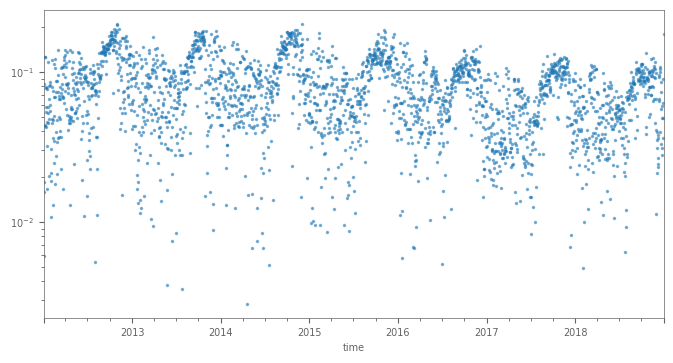

In [129]:
model_name = 'NorESM'
fig, axs = plt.subplots(1, figsize = [8,4])

## Settings
alpha_scatt = 0.6

#xlab = r'T  [$^\circ$C]'
#ylab = r'Terpene emissions [$\mu$gm$^{-2}$s$^{-1}$]'#[$\mu g m^{-3}$]'
linewidth=2
#xlims =[5,30]
#ylims = [4e-3,4e-1]
#xlims = [22,37]


season='FMA'
v_x = 'T_C'
v_y = 'emiisop'
    

df_mo = dic_df_med[model_name]
#mask_months = select_months(df_mo, season=season)
#df_mo = df_mo[mask_months].copy()


v_x = 'FSDS_DRF'
v_y = 'emiisop'
    

ax = axs
#sns.lineplot(y=v_y,data = df_mo, ax= ax, alpha=.3, marker='.')
df_mo[v_y].plot(ax=ax, linewidth=0, marker='.', alpha=.5)
ax.set_yscale('log')

plt.show()

In [130]:
df_mo

ACTREL         lev          BC_A         BC_AC         BC_AI  \
time                                                                       
2012-01-02     0.0  976.325407  8.173660e-12  2.729722e-12  7.125836e-12   
2012-01-03     0.0  976.325407  9.499742e-12  1.565951e-12  5.066372e-12   
2012-01-04     0.0  976.325407  5.789767e-12  6.750846e-13  1.923314e-12   
2012-01-05     0.0  976.325407  8.227288e-12  2.152325e-12  4.934919e-12   
2012-01-06     0.0  976.325407  4.331822e-12  1.428427e-12  2.967275e-12   
...            ...         ...           ...           ...           ...   
2018-12-27     0.0  976.325407  1.375261e-11  6.889458e-12  2.225782e-11   
2018-12-28     0.0  976.325407  9.673373e-12  4.671813e-12  1.384447e-11   
2018-12-29     0.0  976.325407  1.283395e-11  1.048260e-11  1.914479e-11   
2018-12-30     0.0  976.325407  1.365840e-11  9.162976e-12  1.676249e-11   
2018-12-31     0.0  976.325407  1.403066e-11  1.268424e-11  2.014401e-11   

                   BC_AX          BC_N         BC_NI  COAGNUCL    DOD440  ...  \
time                                                                      ...   
2012-01-02  1.334871e-14  1.019651e-13  1.985001e-15  0.000015  0.327653  ...   
2012-01-03  1.697602e-14  1.231952e-13  2.926435e-15  0.000011  0.316712  ...   
2012-01-04  2.409600e-14  2.161883e-13  4.670925e-15  0.000009  0.214686  ...   
2012-01-05  2.303238e-14  1.886180e-13  6.443942e-15  0.000008  0.136757  ...   
2012-01-06  1.917617e-14  1.645704e-13  4.279747e-15  0.000007  0.116273  ...   
...                  ...           ...           ...       ...       ...  ...   
2018-12-27  1.474883e-14  1.267133e-13  1.191621e-14  0.000011  0.137168  ...   
2018-12-28  1.603105e-14  1.510699e-13  1.862302e-14  0.000011  0.152177  ...   
2018-12-29  1.679154e-14  1.325204e-13  2.385236e-14  0.000010  0.310105  ...   
2018-12-30  1.212553e-14  1.141455e-13  9.533418e-15  0.000012  0.365296  ...   
2018-12-31  1.792218e-14  1.445119e-13  1.442395e-14  0.000011  0.338123  ...   

               N100-500    N200-500  obs_OA  obs_N100-500  log10(OA)  \
time                                                                   
2012-01-02          NaN         NaN     NaN           NaN   1.016419   
2012-01-03          NaN         NaN     NaN           NaN   1.011087   
2012-01-04          NaN         NaN     NaN           NaN   0.776740   
2012-01-05          NaN         NaN     NaN           NaN   0.669378   
2012-01-06          NaN         NaN     NaN           NaN   0.731956   
...                 ...         ...     ...           ...        ...   
2018-12-27  2021.333989  106.227136     NaN    198.755727   0.783007   
2018-12-28  1619.031101   71.045641     NaN    137.924253   0.692321   
2018-12-29  1565.183225  104.223052     NaN    251.280145   0.741425   
2018-12-30  2536.686321  156.232722     NaN    247.321205   0.927624   
2018-12-31  2761.673099  220.153235     NaN    239.800301   0.993646   

            log10(N200)  log10(N50)  log10(N150)  log10(N100)  month  
time                                                                  
2012-01-02          NaN         NaN          NaN          NaN      1  
2012-01-03          NaN         NaN          NaN          NaN      1  
2012-01-04          NaN         NaN          NaN          NaN      1  
2012-01-05          NaN         NaN          NaN          NaN      1  
2012-01-06          NaN         NaN          NaN          NaN      1  
...                 ...         ...          ...          ...    ...  
2018-12-27     2.035751    3.654338     2.599809     3.305782     12  
2018-12-28     1.876832    3.646325     2.436010     3.210201     12  
2018-12-29     2.065875    3.578609     2.525968     3.197910     12  
2018-12-30     2.230506    3.677767     2.779575     3.406867     12  
2018-12-31     2.383317    3.649907     2.871529     3.444603     12  

[2556 rows x 119 columns]

### OA flux'ish:


### Residuals

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01204181 0.18104975]
Beta Std Error: [0.00336763 0.00963551]
Beta Covariance: [[ 2.25311492e-05 -6.41603276e-05]
 [-6.41603276e-05  1.84452523e-04]]
Residual Variance: 0.5033437817509537
Inverse Condition #: 0.019103546883913174
Reason(s) for Halting:
  Sum of squares convergence
[0.01204181 0.18104975]
reason for halting
NorESM
[0.01, 0.12]
Beta: [0.00119108 0.34154858]
Beta Std Error: [0.00059121 0.01960924]
Beta Covariance: [[ 5.73166663e-07 -1.89916233e-05]
 [-1.89916233e-05  6.30546671e-04]]
Residual Variance: 0.6098236689325423
Inverse Condition #: 0.012055656629089171
Reason(s) for Halting:
  Sum of squares convergence
[0.00119108 0.34154858]
reason for halting
EC-Earth
[0.01, 0.12]
Beta: [0.01234275 0.20227857]
Beta Std Error: [0.0030818  0.00996902]
Beta Covariance: [[ 1.74612704e-05 -5.64021324e-05]
 [-5.64021324e-05  1.82714338e-04]]
Residual Variance: 0.5439170306602893
Inverse Condition #: 0.011549243496150531
Reason(s) for Halting:
  Sum 

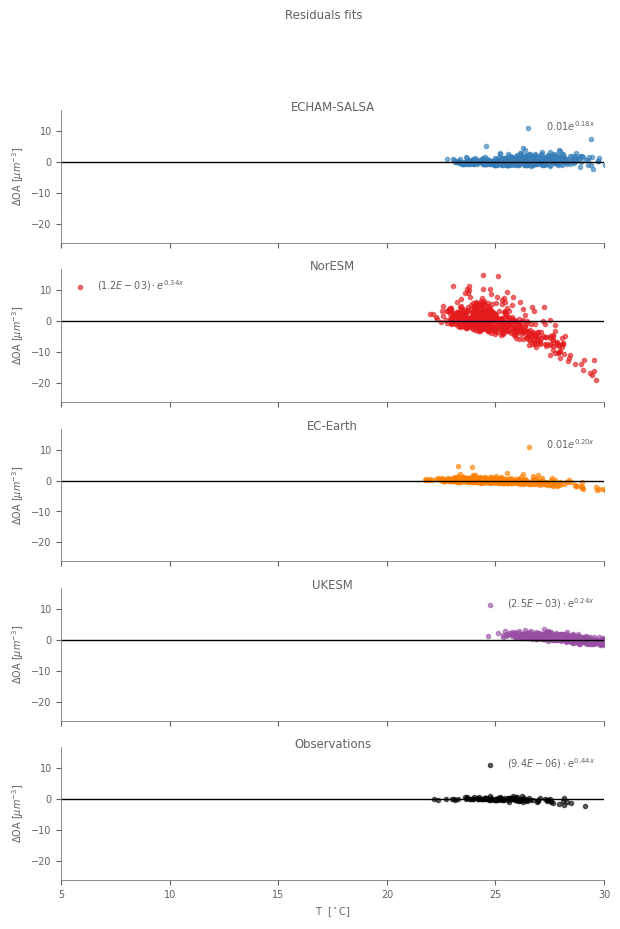

In [131]:

## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'

season = 'FMA'
xlims = [5,30]

#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'


xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_ln_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

# Nx new version

In [132]:
    df_s =  dic_df_med[mo]

In [133]:
_df = dic_df_med['ECHAM-SALSA']
_df['emiisop']

time
2012-01-01    0.027221
2012-01-02    0.019255
2012-01-03    0.018712
2012-01-04    0.016141
2012-01-05    0.023593
                ...   
2018-12-27    0.017255
2018-12-28    0.027167
2018-12-29    0.026082
2018-12-30    0.017147
2018-12-31    0.131585
Freq: D, Name: emiisop, Length: 2557, dtype: float64

In [134]:
dic_df_med[mod]

ACTREL         lev          BC_A         BC_AC         BC_AI  \
time                                                                       
2012-01-02     0.0  976.325407  8.173660e-12  2.729722e-12  7.125836e-12   
2012-01-03     0.0  976.325407  9.499742e-12  1.565951e-12  5.066372e-12   
2012-01-04     0.0  976.325407  5.789767e-12  6.750846e-13  1.923314e-12   
2012-01-05     0.0  976.325407  8.227288e-12  2.152325e-12  4.934919e-12   
2012-01-06     0.0  976.325407  4.331822e-12  1.428427e-12  2.967275e-12   
...            ...         ...           ...           ...           ...   
2018-12-27     0.0  976.325407  1.375261e-11  6.889458e-12  2.225782e-11   
2018-12-28     0.0  976.325407  9.673373e-12  4.671813e-12  1.384447e-11   
2018-12-29     0.0  976.325407  1.283395e-11  1.048260e-11  1.914479e-11   
2018-12-30     0.0  976.325407  1.365840e-11  9.162976e-12  1.676249e-11   
2018-12-31     0.0  976.325407  1.403066e-11  1.268424e-11  2.014401e-11   

                   BC_AX          BC_N         BC_NI  COAGNUCL    DOD440  ...  \
time                                                                      ...   
2012-01-02  1.334871e-14  1.019651e-13  1.985001e-15  0.000015  0.327653  ...   
2012-01-03  1.697602e-14  1.231952e-13  2.926435e-15  0.000011  0.316712  ...   
2012-01-04  2.409600e-14  2.161883e-13  4.670925e-15  0.000009  0.214686  ...   
2012-01-05  2.303238e-14  1.886180e-13  6.443942e-15  0.000008  0.136757  ...   
2012-01-06  1.917617e-14  1.645704e-13  4.279747e-15  0.000007  0.116273  ...   
...                  ...           ...           ...       ...       ...  ...   
2018-12-27  1.474883e-14  1.267133e-13  1.191621e-14  0.000011  0.137168  ...   
2018-12-28  1.603105e-14  1.510699e-13  1.862302e-14  0.000011  0.152177  ...   
2018-12-29  1.679154e-14  1.325204e-13  2.385236e-14  0.000010  0.310105  ...   
2018-12-30  1.212553e-14  1.141455e-13  9.533418e-15  0.000012  0.365296  ...   
2018-12-31  1.792218e-14  1.445119e-13  1.442395e-14  0.000011  0.338123  ...   

               N100-500    N200-500  obs_OA  obs_N100-500  log10(OA)  \
time                                                                   
2012-01-02          NaN         NaN     NaN           NaN   1.016419   
2012-01-03          NaN         NaN     NaN           NaN   1.011087   
2012-01-04          NaN         NaN     NaN           NaN   0.776740   
2012-01-05          NaN         NaN     NaN           NaN   0.669378   
2012-01-06          NaN         NaN     NaN           NaN   0.731956   
...                 ...         ...     ...           ...        ...   
2018-12-27  2021.333989  106.227136     NaN    198.755727   0.783007   
2018-12-28  1619.031101   71.045641     NaN    137.924253   0.692321   
2018-12-29  1565.183225  104.223052     NaN    251.280145   0.741425   
2018-12-30  2536.686321  156.232722     NaN    247.321205   0.927624   
2018-12-31  2761.673099  220.153235     NaN    239.800301   0.993646   

            log10(N200)  log10(N50)  log10(N150)  log10(N100)  month  
time                                                                  
2012-01-02          NaN         NaN          NaN          NaN      1  
2012-01-03          NaN         NaN          NaN          NaN      1  
2012-01-04          NaN         NaN          NaN          NaN      1  
2012-01-05          NaN         NaN          NaN          NaN      1  
2012-01-06          NaN         NaN          NaN          NaN      1  
...                 ...         ...          ...          ...    ...  
2018-12-27     2.035751    3.654338     2.599809     3.305782     12  
2018-12-28     1.876832    3.646325     2.436010     3.210201     12  
2018-12-29     2.065875    3.578609     2.525968     3.197910     12  
2018-12-30     2.230506    3.677767     2.779575     3.406867     12  
2018-12-31     2.383317    3.649907     2.871529     3.444603     12  

[2556 rows x 119 columns]

In [135]:
dic_df_med[mod]

ACTREL         lev          BC_A         BC_AC         BC_AI  \
time                                                                       
2012-01-02     0.0  976.325407  8.173660e-12  2.729722e-12  7.125836e-12   
2012-01-03     0.0  976.325407  9.499742e-12  1.565951e-12  5.066372e-12   
2012-01-04     0.0  976.325407  5.789767e-12  6.750846e-13  1.923314e-12   
2012-01-05     0.0  976.325407  8.227288e-12  2.152325e-12  4.934919e-12   
2012-01-06     0.0  976.325407  4.331822e-12  1.428427e-12  2.967275e-12   
...            ...         ...           ...           ...           ...   
2018-12-27     0.0  976.325407  1.375261e-11  6.889458e-12  2.225782e-11   
2018-12-28     0.0  976.325407  9.673373e-12  4.671813e-12  1.384447e-11   
2018-12-29     0.0  976.325407  1.283395e-11  1.048260e-11  1.914479e-11   
2018-12-30     0.0  976.325407  1.365840e-11  9.162976e-12  1.676249e-11   
2018-12-31     0.0  976.325407  1.403066e-11  1.268424e-11  2.014401e-11   

                   BC_AX          BC_N         BC_NI  COAGNUCL    DOD440  ...  \
time                                                                      ...   
2012-01-02  1.334871e-14  1.019651e-13  1.985001e-15  0.000015  0.327653  ...   
2012-01-03  1.697602e-14  1.231952e-13  2.926435e-15  0.000011  0.316712  ...   
2012-01-04  2.409600e-14  2.161883e-13  4.670925e-15  0.000009  0.214686  ...   
2012-01-05  2.303238e-14  1.886180e-13  6.443942e-15  0.000008  0.136757  ...   
2012-01-06  1.917617e-14  1.645704e-13  4.279747e-15  0.000007  0.116273  ...   
...                  ...           ...           ...       ...       ...  ...   
2018-12-27  1.474883e-14  1.267133e-13  1.191621e-14  0.000011  0.137168  ...   
2018-12-28  1.603105e-14  1.510699e-13  1.862302e-14  0.000011  0.152177  ...   
2018-12-29  1.679154e-14  1.325204e-13  2.385236e-14  0.000010  0.310105  ...   
2018-12-30  1.212553e-14  1.141455e-13  9.533418e-15  0.000012  0.365296  ...   
2018-12-31  1.792218e-14  1.445119e-13  1.442395e-14  0.000011  0.338123  ...   

               N100-500    N200-500  obs_OA  obs_N100-500  log10(OA)  \
time                                                                   
2012-01-02          NaN         NaN     NaN           NaN   1.016419   
2012-01-03          NaN         NaN     NaN           NaN   1.011087   
2012-01-04          NaN         NaN     NaN           NaN   0.776740   
2012-01-05          NaN         NaN     NaN           NaN   0.669378   
2012-01-06          NaN         NaN     NaN           NaN   0.731956   
...                 ...         ...     ...           ...        ...   
2018-12-27  2021.333989  106.227136     NaN    198.755727   0.783007   
2018-12-28  1619.031101   71.045641     NaN    137.924253   0.692321   
2018-12-29  1565.183225  104.223052     NaN    251.280145   0.741425   
2018-12-30  2536.686321  156.232722     NaN    247.321205   0.927624   
2018-12-31  2761.673099  220.153235     NaN    239.800301   0.993646   

            log10(N200)  log10(N50)  log10(N150)  log10(N100)  month  
time                                                                  
2012-01-02          NaN         NaN          NaN          NaN      1  
2012-01-03          NaN         NaN          NaN          NaN      1  
2012-01-04          NaN         NaN          NaN          NaN      1  
2012-01-05          NaN         NaN          NaN          NaN      1  
2012-01-06          NaN         NaN          NaN          NaN      1  
...                 ...         ...          ...          ...    ...  
2018-12-27     2.035751    3.654338     2.599809     3.305782     12  
2018-12-28     1.876832    3.646325     2.436010     3.210201     12  
2018-12-29     2.065875    3.578609     2.525968     3.197910     12  
2018-12-30     2.230506    3.677767     2.779575     3.406867     12  
2018-12-31     2.383317    3.649907     2.871529     3.444603     12  

[2556 rows x 119 columns]

In [136]:

df_emiterp_all = pd.DataFrame()

df_emiisop_all = pd.DataFrame()
for mod in dic_df_med.keys():
    if mod=='Obs' or mod=='Observations':
        continue
    print(mod)
    df_emiterp_all[mod] = dic_df_med[mod]['emiterp']
    df_emiisop_all[mod] = dic_df_med[mod]['emiisop']




ECHAM-SALSA
NorESM
EC-Earth
UKESM


In [137]:
df_emiterp_all

ECHAM-SALSA    NorESM  EC-Earth     UKESM
time                                                 
2012-01-01     0.135233       NaN  0.012326  0.096328
2012-01-02     0.141301  0.132064  0.011530  0.103147
2012-01-03     0.132251  0.125336  0.016653  0.091901
2012-01-04     0.121320  0.131370  0.013909  0.091655
2012-01-05     0.122842  0.128460  0.015433  0.082373
...                 ...       ...       ...       ...
2018-12-27     0.104923  0.098147  0.016278  0.102457
2018-12-28     0.108618  0.092695  0.015465  0.107816
2018-12-29     0.100736  0.117983  0.015456  0.106028
2018-12-30     0.101135  0.082907  0.018551  0.112000
2018-12-31     0.132814  0.112423  0.021006  0.171979

[2557 rows x 4 columns]

In [138]:
seasons2months = {'DJF':[12,1,2],
        'MAM': [3,4,5],
        'JJA':[6,7,8],
        'SON':[9,10,11],
       }
seasons2months = {'DJF':[12,1,2],
        'MAM': [3,4,5],
        'JJA':[6,7,8],
        'SON':[9,10,11],
       }

In [139]:
seasons2months2 = {'JFM': [ 1, 2,3], 'AMJ': [ 4, 5,6], 'JAS': [ 7, 8,9], 'OND': [ 10, 11,12]}

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
Plots/ATTO/scat_all_years_echam_noresm_noresm_echam_seasons2_emiterp_emiterp_hist-ATTO_ukesm_lev-2.png


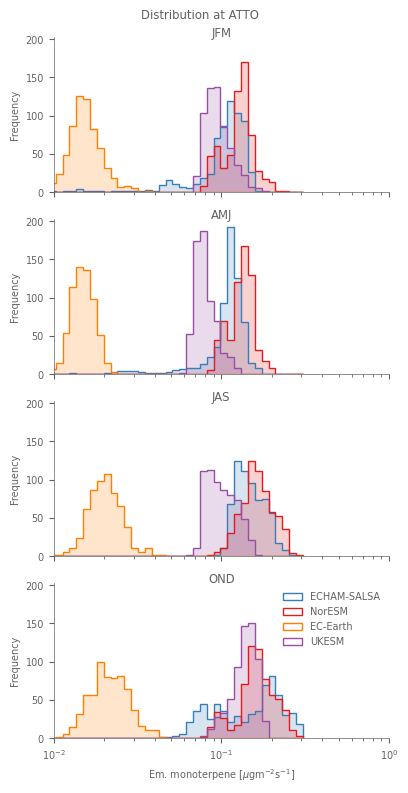

In [140]:
fig, axs = plt.subplots(4,figsize = [4,8,],sharex=True, sharey=True)
_df_use = df_emiterp_all


mi = np.min(np.min(_df_use[_df_use>0]))
ma = np.max(np.max(_df_use[_df_use>0])*.999)
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)
for seas,ax in zip(seasons2months2, axs.flatten()):
    df_OA_all_sub = _df_use.copy()
    
    if 'UKESM' in _df_use.columns:
        mo = 'UKESM'
        df_OA_all_sub[mo] =df_OA_all_sub.loc[:,mo].ffill(limit=3).copy()
        
    df_OA_all_sub = df_OA_all_sub[df_OA_all_sub.index.month.isin(seasons2months2[seas])].copy()


    for mo in models:
        print(mo)
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=1, 
                                     color=cdic_model[mo],
                                     label=mo,
                                    ax = ax,
                                    histtype='step'
                                    )
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=0.2, 
                                     color=cdic_model[mo],
                                     label='__nolabel__',
                                    ax = ax
                                    )

        ax.set_xscale('log')
    #_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

    ax.set_xlabel('Em. monoterpene [$\mu$gm$^{-2}$s$^{-1}$]')

    ax.set_title(f'{seas}', y=.95)

ax.legend(frameon=False)
plt.suptitle('Distribution at ATTO')
fn = make_fn_scat('noresm_echam_seasons2_emiterp', 'emiterp','hist')
fig.tight_layout()
sns.despine(fig)
print(fn)
#plt#.savefig(fn, dpi=300)

ax.set_xlim([1e-2,1e0])
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
Plots/ATTO/scat_all_years_echam_noresm_noresm_echam_seasons2_emiterp_emiterp_hist-ATTO_ukesm_lev-2.png


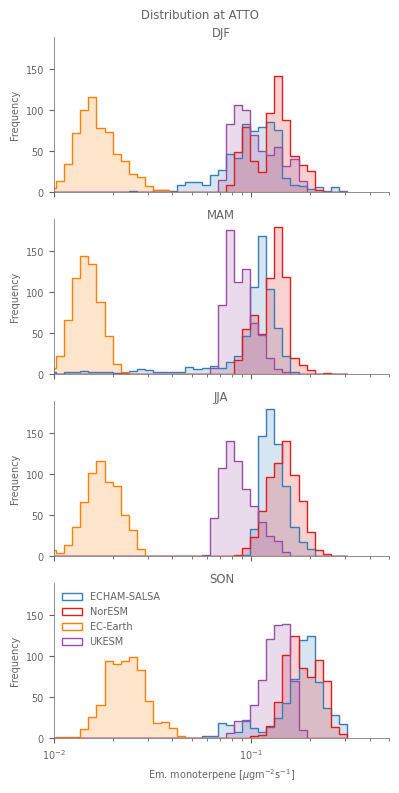

In [141]:
fig, axs = plt.subplots(4,figsize = [4,8,],sharex=True, sharey=True)
_df_use = df_emiterp_all


mi = np.min(np.min(_df_use[_df_use>0]))
ma = np.max(np.max(_df_use[_df_use>0])*.999)
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)
for seas,ax in zip(seasons2months, axs.flatten()):
    df_OA_all_sub = _df_use.copy()
    
    if 'UKESM' in _df_use.columns:
        mo = 'UKESM'
        df_OA_all_sub[mo] =df_OA_all_sub.loc[:,mo].ffill(limit=3).copy()
        
    df_OA_all_sub = df_OA_all_sub[df_OA_all_sub.index.month.isin(seasons2months[seas])].copy()


    for mo in models:
        print(mo)
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=1, 
                                     color=cdic_model[mo],
                                     label=mo,
                                    ax = ax,
                                    histtype='step'
                                    )
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=0.2, 
                                     color=cdic_model[mo],
                                     label='__nolabel__',
                                    ax = ax
                                    )

        ax.set_xscale('log')
    #_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

    ax.set_xlabel('Em. monoterpene [$\mu$gm$^{-2}$s$^{-1}$]')

    ax.set_title(f'{seas}', y=.95)

ax.legend(frameon=False)
plt.suptitle('Distribution at ATTO')
fn = make_fn_scat('noresm_echam_seasons2_emiterp', 'emiterp','hist')
fig.tight_layout()
sns.despine(fig)
print(fn)
#plt#.savefig(fn, dpi=300)

ax.set_xlim([1e-2,5e-1])
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
ECHAM-SALSA
NorESM
EC-Earth
UKESM
Plots/ATTO/scat_all_years_echam_noresm_noresm_echam_seasons2_emiterp_emiterp_hist-ATTO_ukesm_lev-2.png


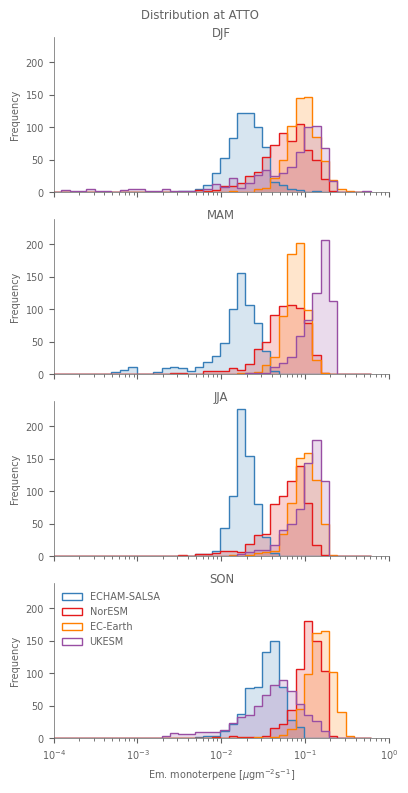

In [142]:
fig, axs = plt.subplots(4,figsize = [4,8,],sharex=True, sharey=True)
_df_use = df_emiisop_all


mi = np.min(np.min(_df_use[_df_use>0]))*10
ma = np.max(np.max(_df_use[_df_use>0]))
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 200)
for seas,ax in zip(seasons2months, axs.flatten()):
    df_OA_all_sub = _df_use.copy()
    
    if 'UKESM' in _df_use.columns:
        mo = 'UKESM'
        df_OA_all_sub[mo] =df_OA_all_sub.loc[:,mo].ffill(limit=3).copy()
        
    df_OA_all_sub = df_OA_all_sub[df_OA_all_sub.index.month.isin(seasons2months[seas])].copy()


    for mo in models:
        print(mo)
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=1, 
                                     color=cdic_model[mo],
                                     label=mo,
                                    ax = ax,
                                    histtype='step'
                                    )
        df_OA_all_sub[mo].plot.hist(bins=bins_, alpha=0.2, 
                                     color=cdic_model[mo],
                                     label='__nolabel__',
                                    ax = ax
                                    )

        ax.set_xscale('log')
    #_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

    ax.set_xlabel('Em. monoterpene [$\mu$gm$^{-2}$s$^{-1}$]')

    ax.set_title(f'{seas}', y=.95)

ax.legend(frameon=False)
plt.suptitle('Distribution at ATTO')
fn = make_fn_scat('noresm_echam_seasons2_emiterp', 'emiterp','hist')
fig.tight_layout()
sns.despine(fig)
print(fn)
#plt#.savefig(fn, dpi=300)

ax.set_xlim([1e-4,1e0])

plt.savefig(fn.with_suffix('.pdf'), dpi=300)

# Compare seasons